In [1]:
#Importing Librarires
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt


# We dont Probably need the Gridlines. Do we? If yes comment this line
sns.set(style="ticks")

flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"] # defining the colour palette
flatui = sns.color_palette(flatui)

In [1]:
from wordcloud import WordCloud  # importing the worldcloud module. Wordcloud uses the text sizes to represent the frequency of the text

In [5]:
fifa=pd.read_csv("FIFA_data.csv",index_col=[0]) # reading the dataset

In [ ]:
# pd.set_option('max_column',None)

In [6]:
fifa.head(5)

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club Logo  ...  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   

  Composure Marking  StandingTackle SlidingTackle  GKDiving  GKHandling  \
0      96.0    33.0            28.0          26.0       6.0        11.0   
1      95.0    28.0            31.0          23.0       7.0        11.0   
2      94.0    27.0            24.0          33.0       9.0         9.0   
3      68.0    15.0            21.0          13.0      90.0        85.0   
4      88.0    68.0            58.0          51.0      15.0        13.0   

   GKKicking GKPositioning GKReflexes Release Clause  
0       15.0          14.0        8.0        €226.5M  
1       15.0          14.0       11.0        €127.1M  
2       15.0          15.0       11.0        €228.1M  
3       87.0          88.0       94.0        €138.6M  
4        5.0          10.0       13.0        €196.4M  

[5 rows x 88 columns]

In [7]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [8]:
fifa.shape # checking the number of rows and columns in the dataset

(18207, 88)

In [9]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18207 entries, 0 to 18206
Data columns (total 88 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Photo                     18207 non-null  object 
 4   Nationality               18207 non-null  object 
 5   Flag                      18207 non-null  object 
 6   Overall                   18207 non-null  int64  
 7   Potential                 18207 non-null  int64  
 8   Club                      17966 non-null  object 
 9   Club Logo                 18207 non-null  object 
 10  Value                     18207 non-null  object 
 11  Wage                      18207 non-null  object 
 12  Special                   18207 non-null  int64  
 13  Preferred Foot            18159 non-null  object 
 14  Intern

In [10]:
fifa.isnull().sum() # checking the count of the missing values in each column

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 88, dtype: int64

In [11]:
import missingno as msno

In [12]:
fifa.shape

(18207, 88)

In [13]:
tempdf = fifa.iloc[:,65:]
tempdf.shape

(18207, 23)

<Axes: >

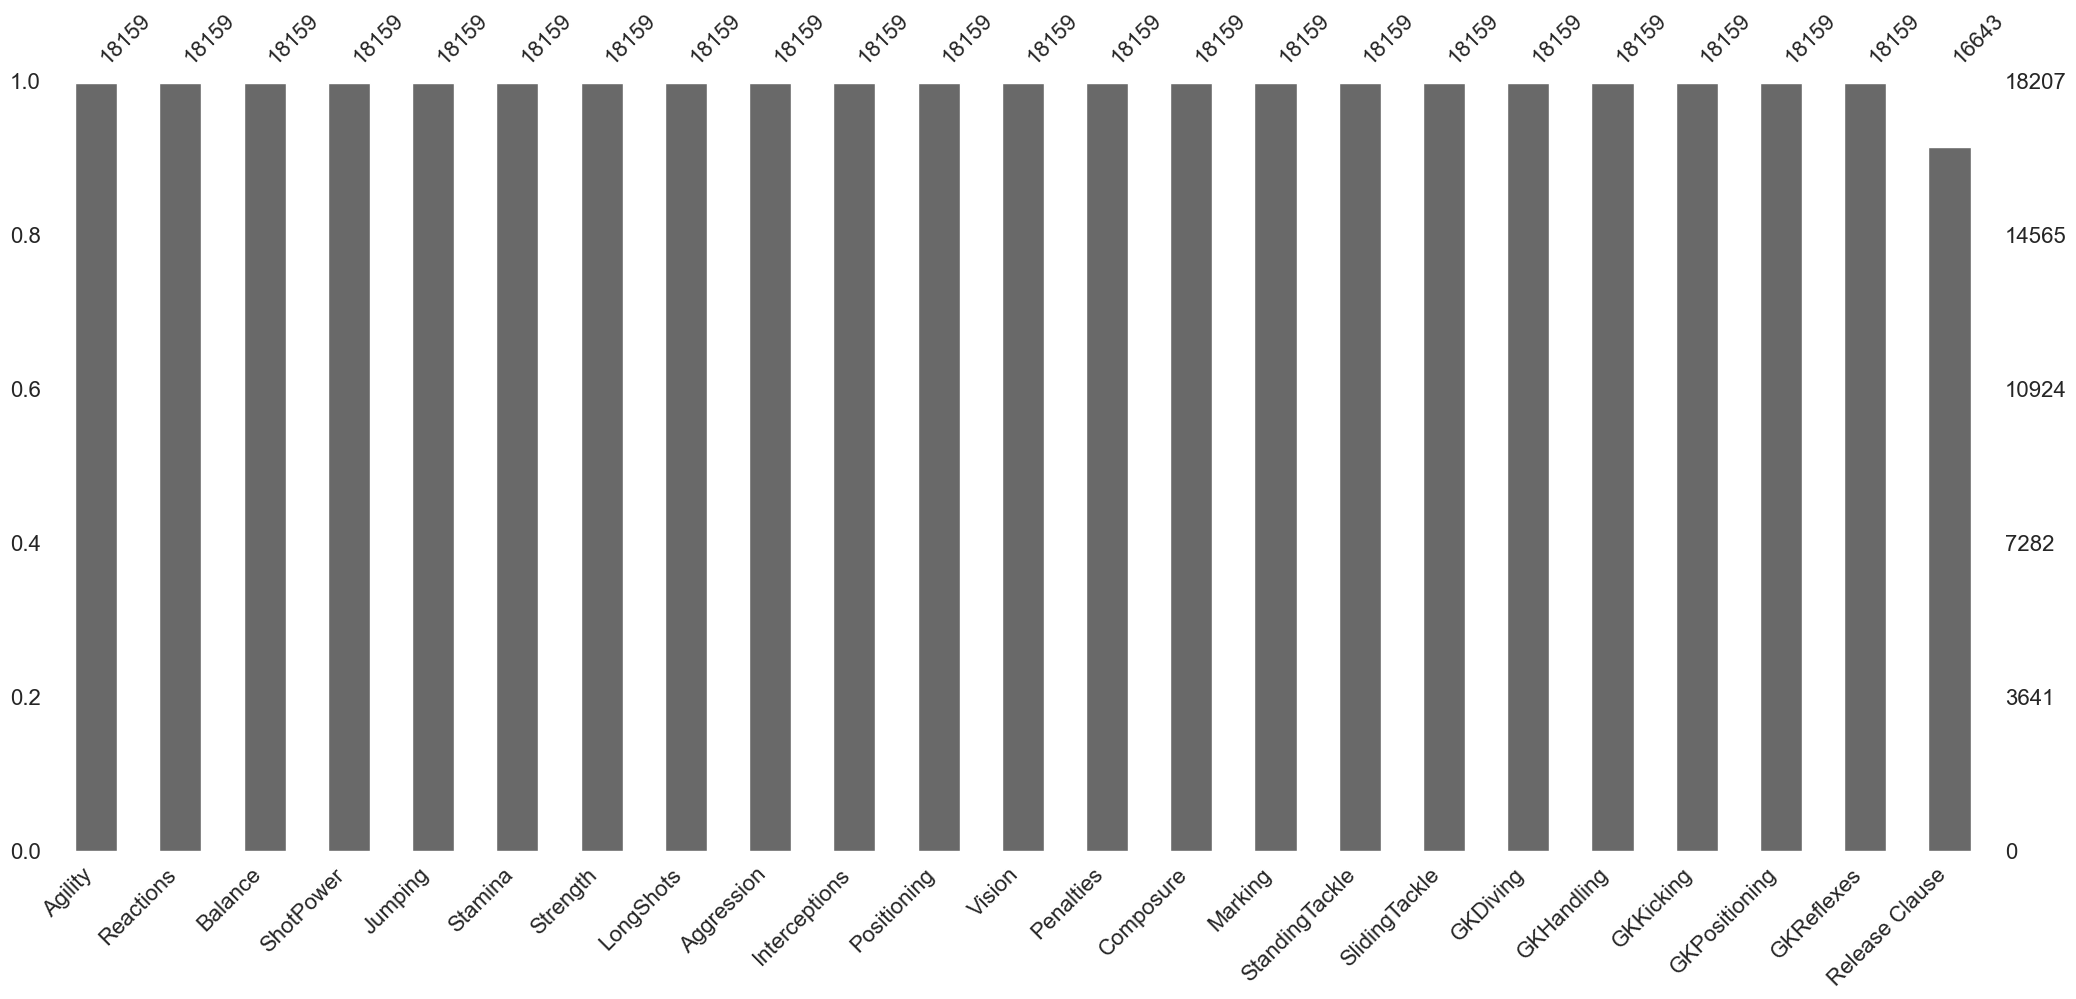

In [14]:
msno.bar(tempdf)

In [15]:
temp = fifa.loc[:, 'Name':'Club']
temp

Name  Age  \
0                L. Messi   31   
1       Cristiano Ronaldo   33   
2               Neymar Jr   26   
3                  De Gea   27   
4            K. De Bruyne   27   
...                   ...  ...   
18202        J. Lundstram   19   
18203  N. Christoffersson   19   
18204           B. Worman   16   
18205      D. Walker-Rice   17   
18206           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  
0             FC Barcelona  
1                 Juventus  
2      Paris Saint-Germain  
3        Manchester United  
4          Manchester City  
...                    ...  
18202      Crewe Alexandra  
18203       Trelleborgs FF  
18204     Cambridge United  
18205      Tranmere Rovers  
18206      Tranmere Rovers  

[18207 rows x 8 columns]

In [16]:
fifa['Club'].isnull().sum()

241

<Axes: >

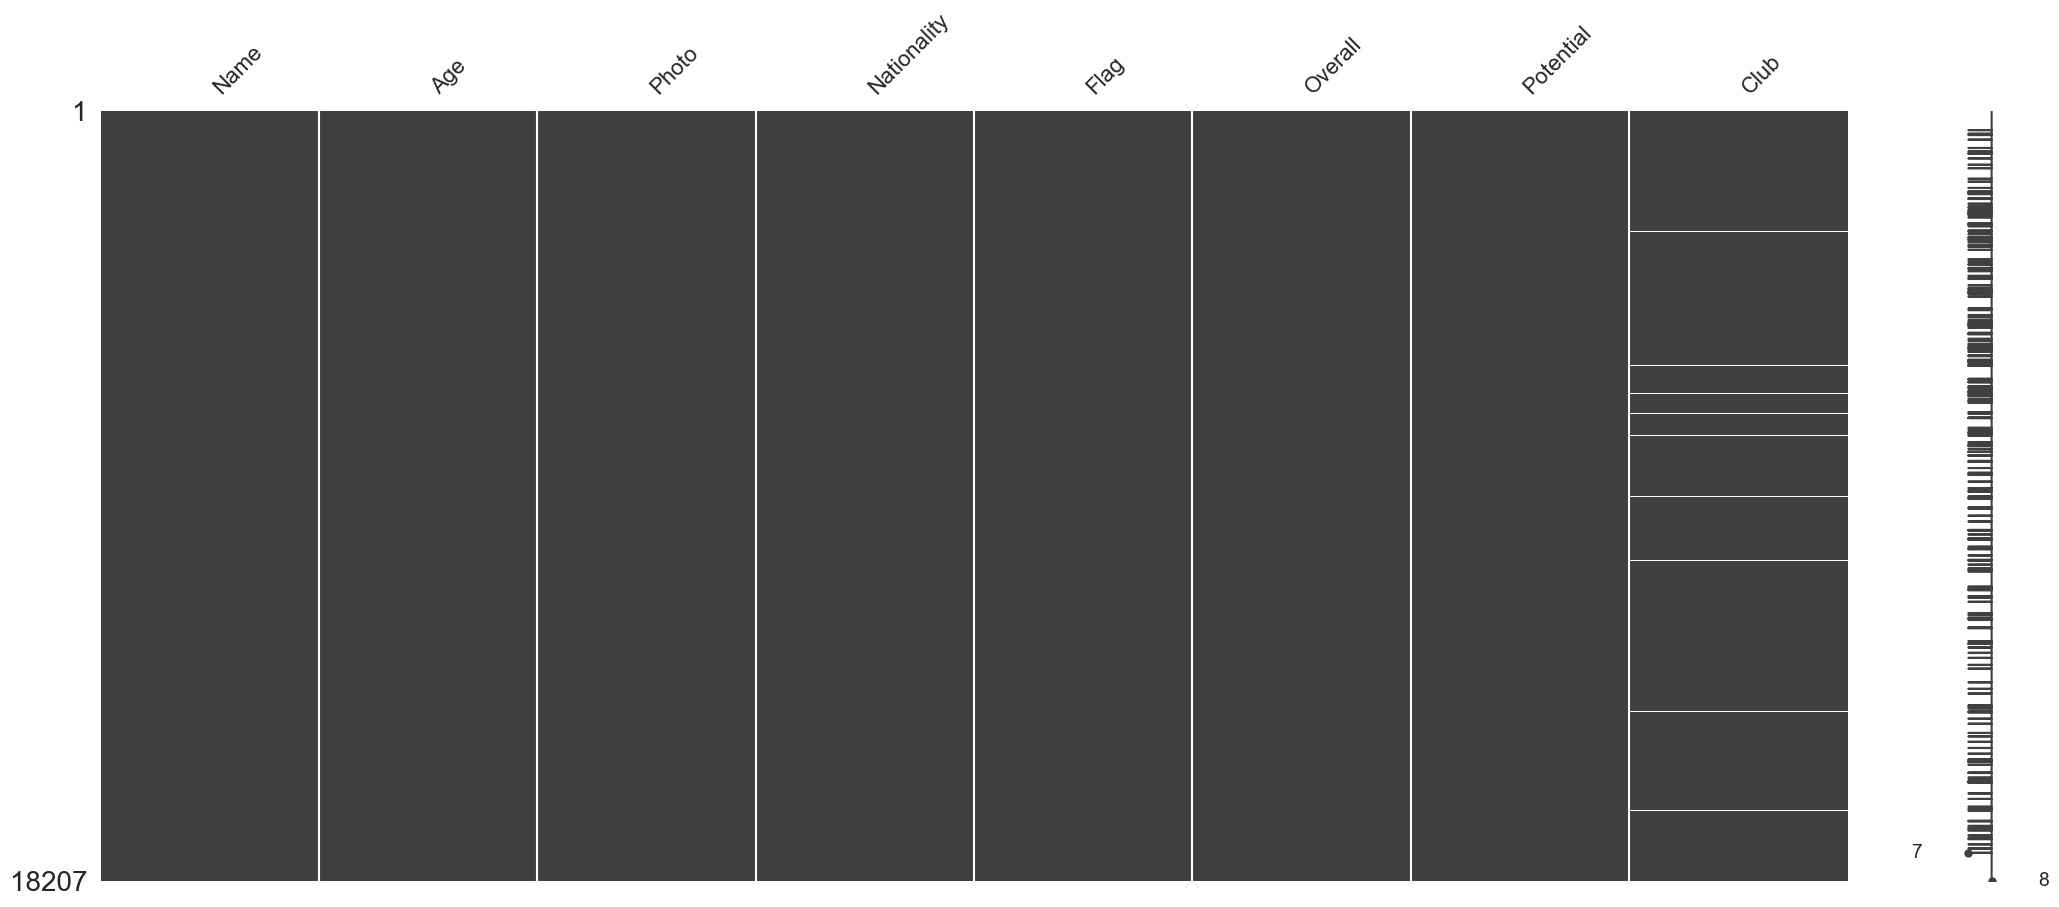

In [17]:
msno.matrix(temp)

## heatmap

Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.

Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.

Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.

There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

In [18]:
fifa.columns # listing the columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

<Axes: >

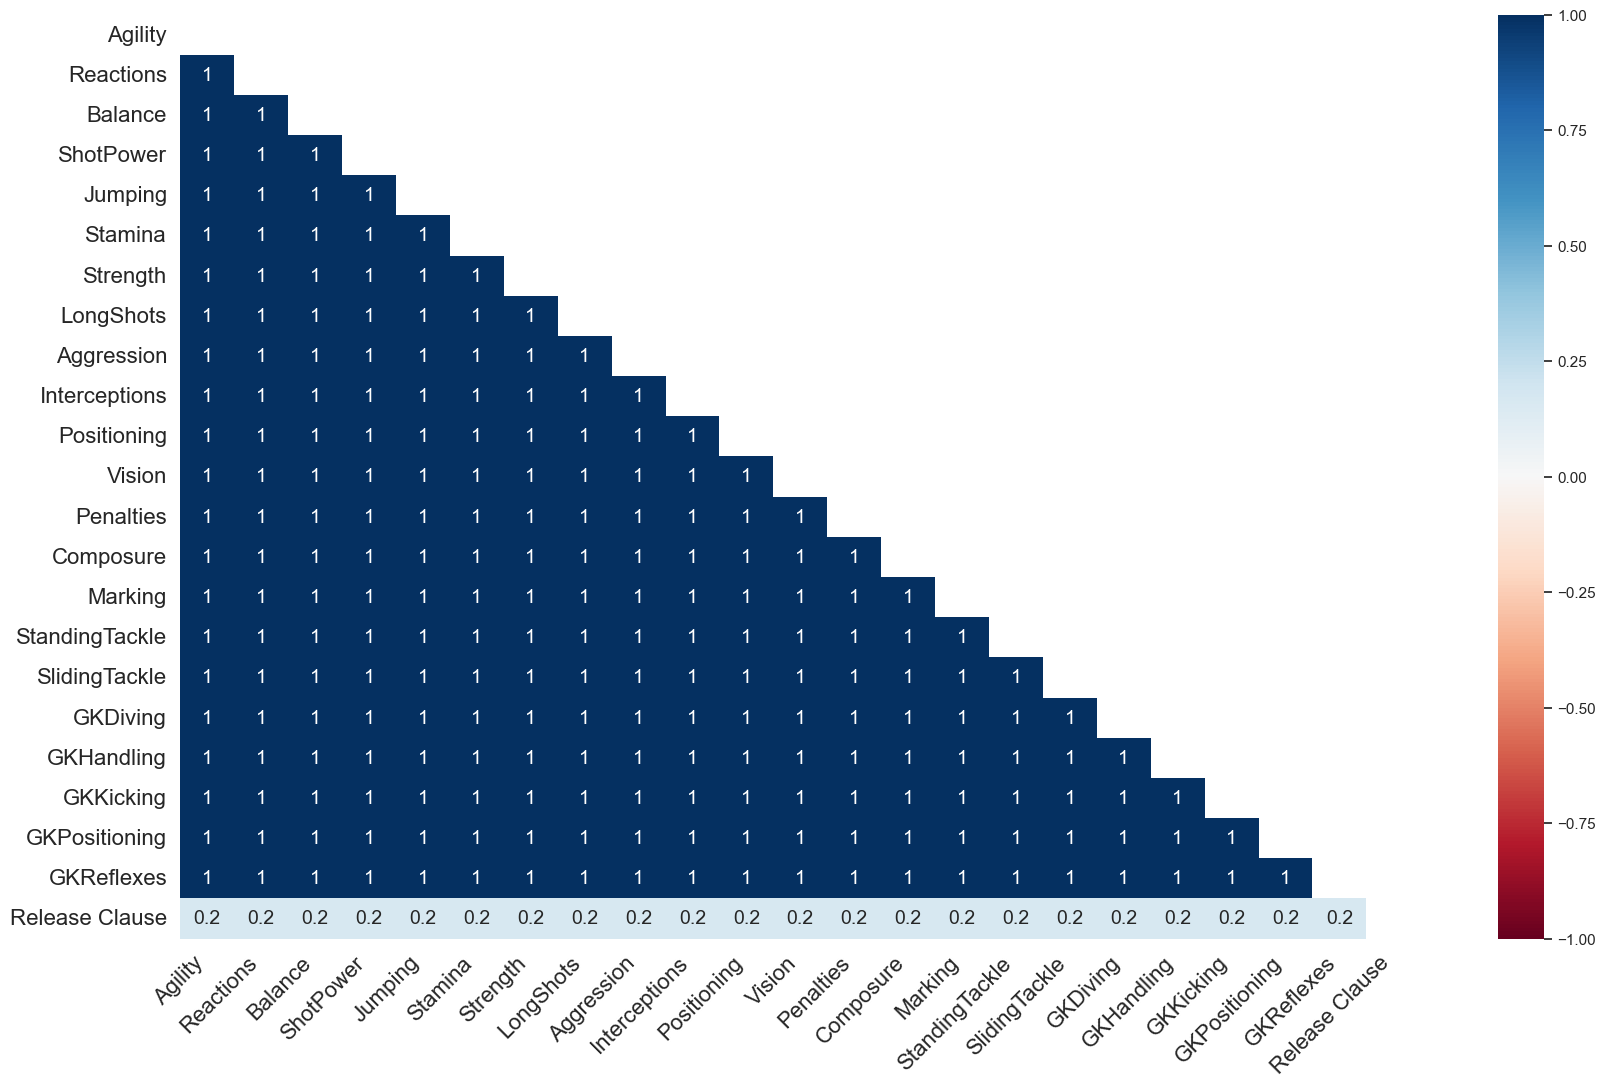

In [19]:
msno.heatmap(tempdf)

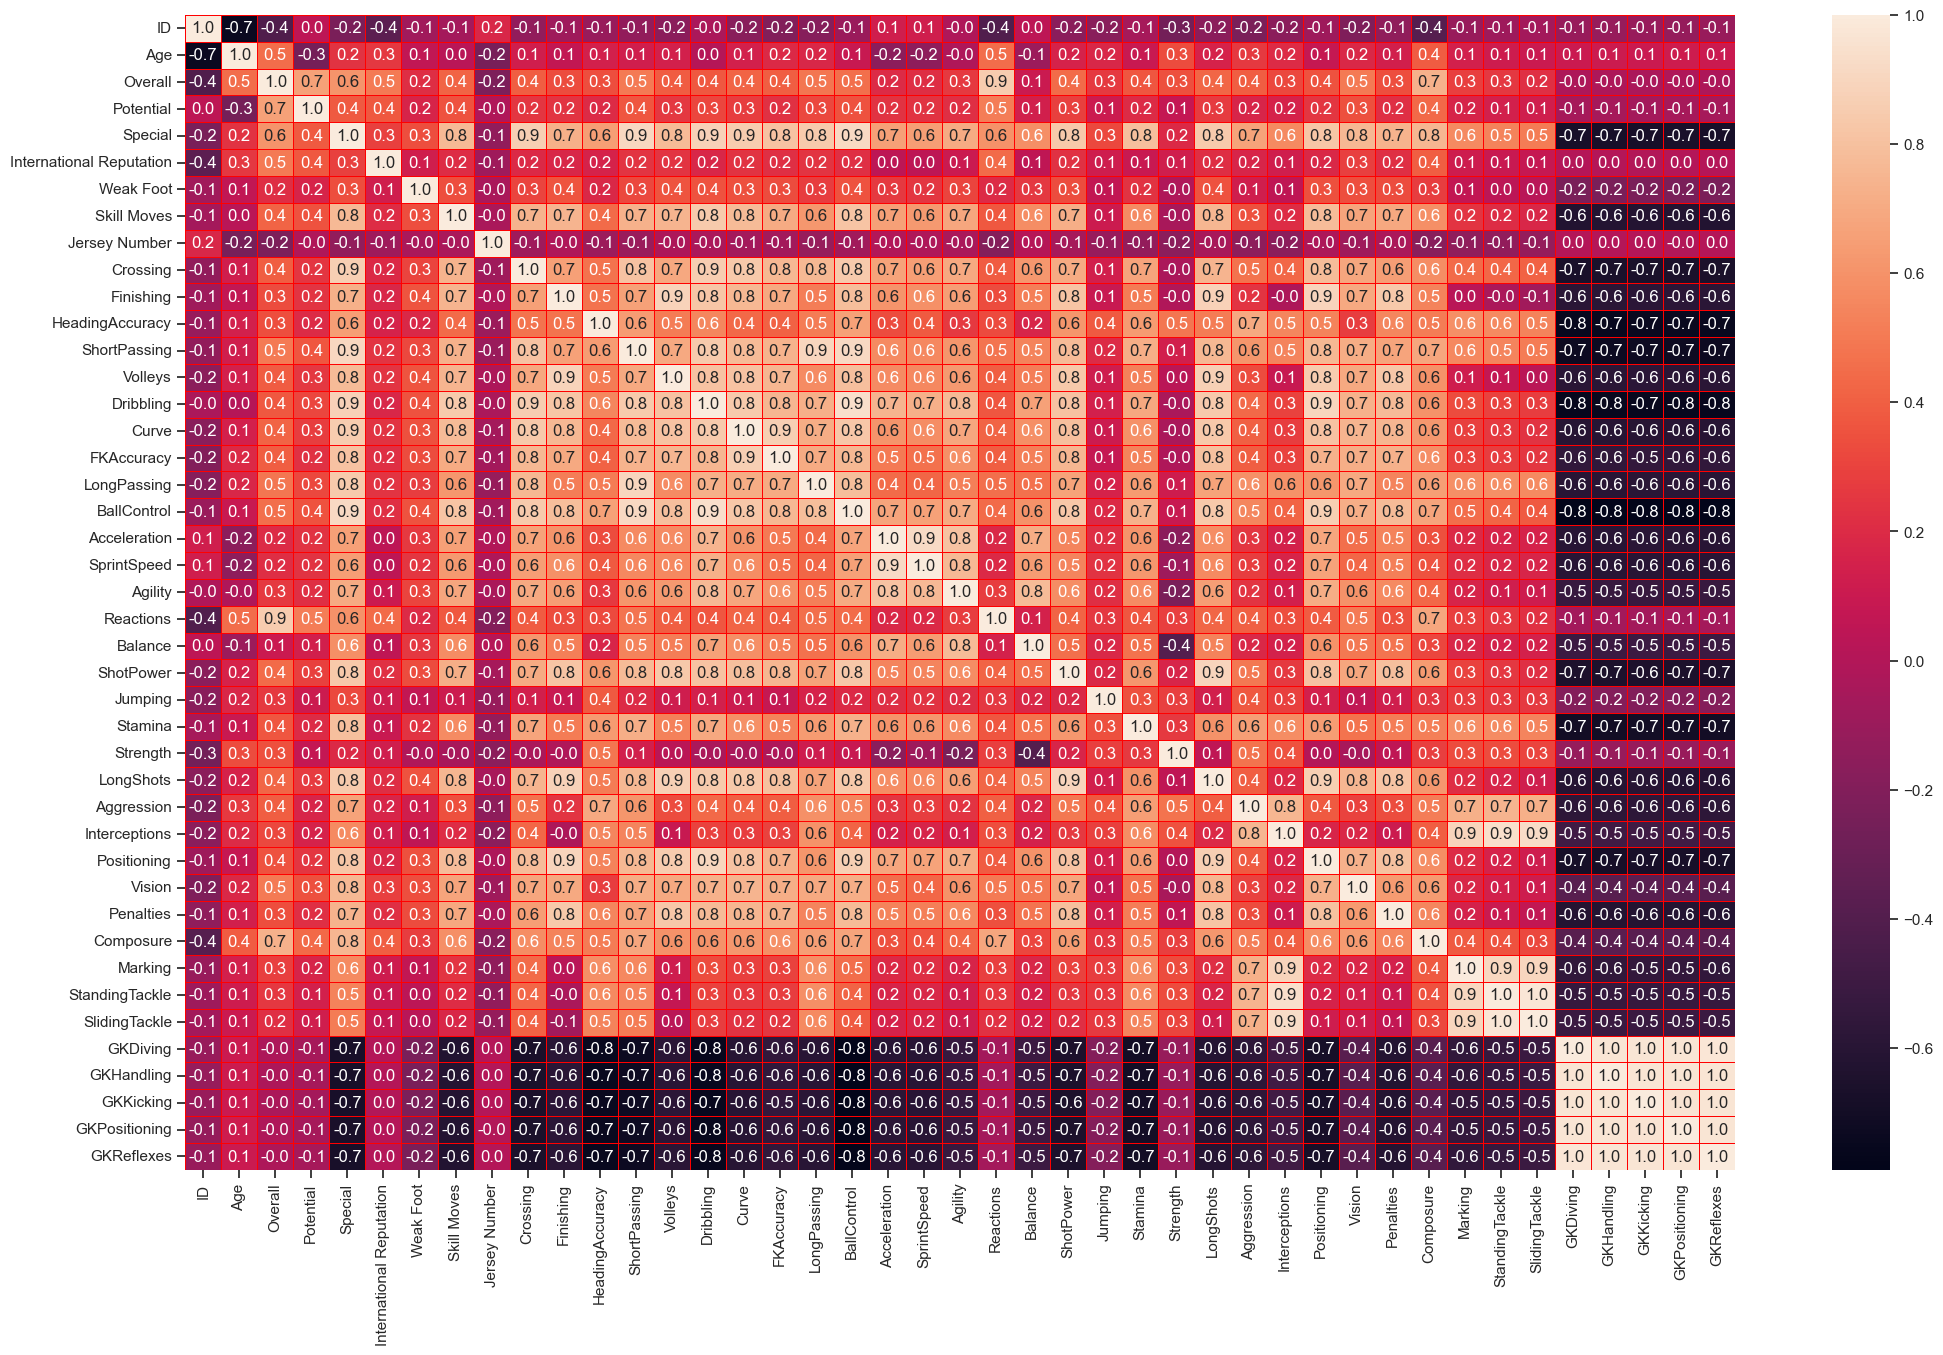

In [20]:
# Plotting the Heatmap of the columns using correlation matrix
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(fifa.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [21]:
fifa['Name'].duplicated().sum()

1013

In [22]:
fifa['Nationality']

0        Argentina
1         Portugal
2           Brazil
3            Spain
4          Belgium
           ...    
18202      England
18203       Sweden
18204      England
18205      England
18206      England
Name: Nationality, Length: 18207, dtype: object

In [23]:
from wordcloud import WordCloud 

In [24]:
fifa.Nationality.head()

0    Argentina
1     Portugal
2       Brazil
3        Spain
4      Belgium
Name: Nationality, dtype: object

In [25]:
fifa.Nationality.value_counts()

England                 1662
Germany                 1198
Spain                   1072
Argentina                937
France                   914
                        ... 
New Caledonia              1
Fiji                       1
São Tomé & Príncipe        1
United Arab Emirates       1
Botswana                   1
Name: Nationality, Length: 164, dtype: int64

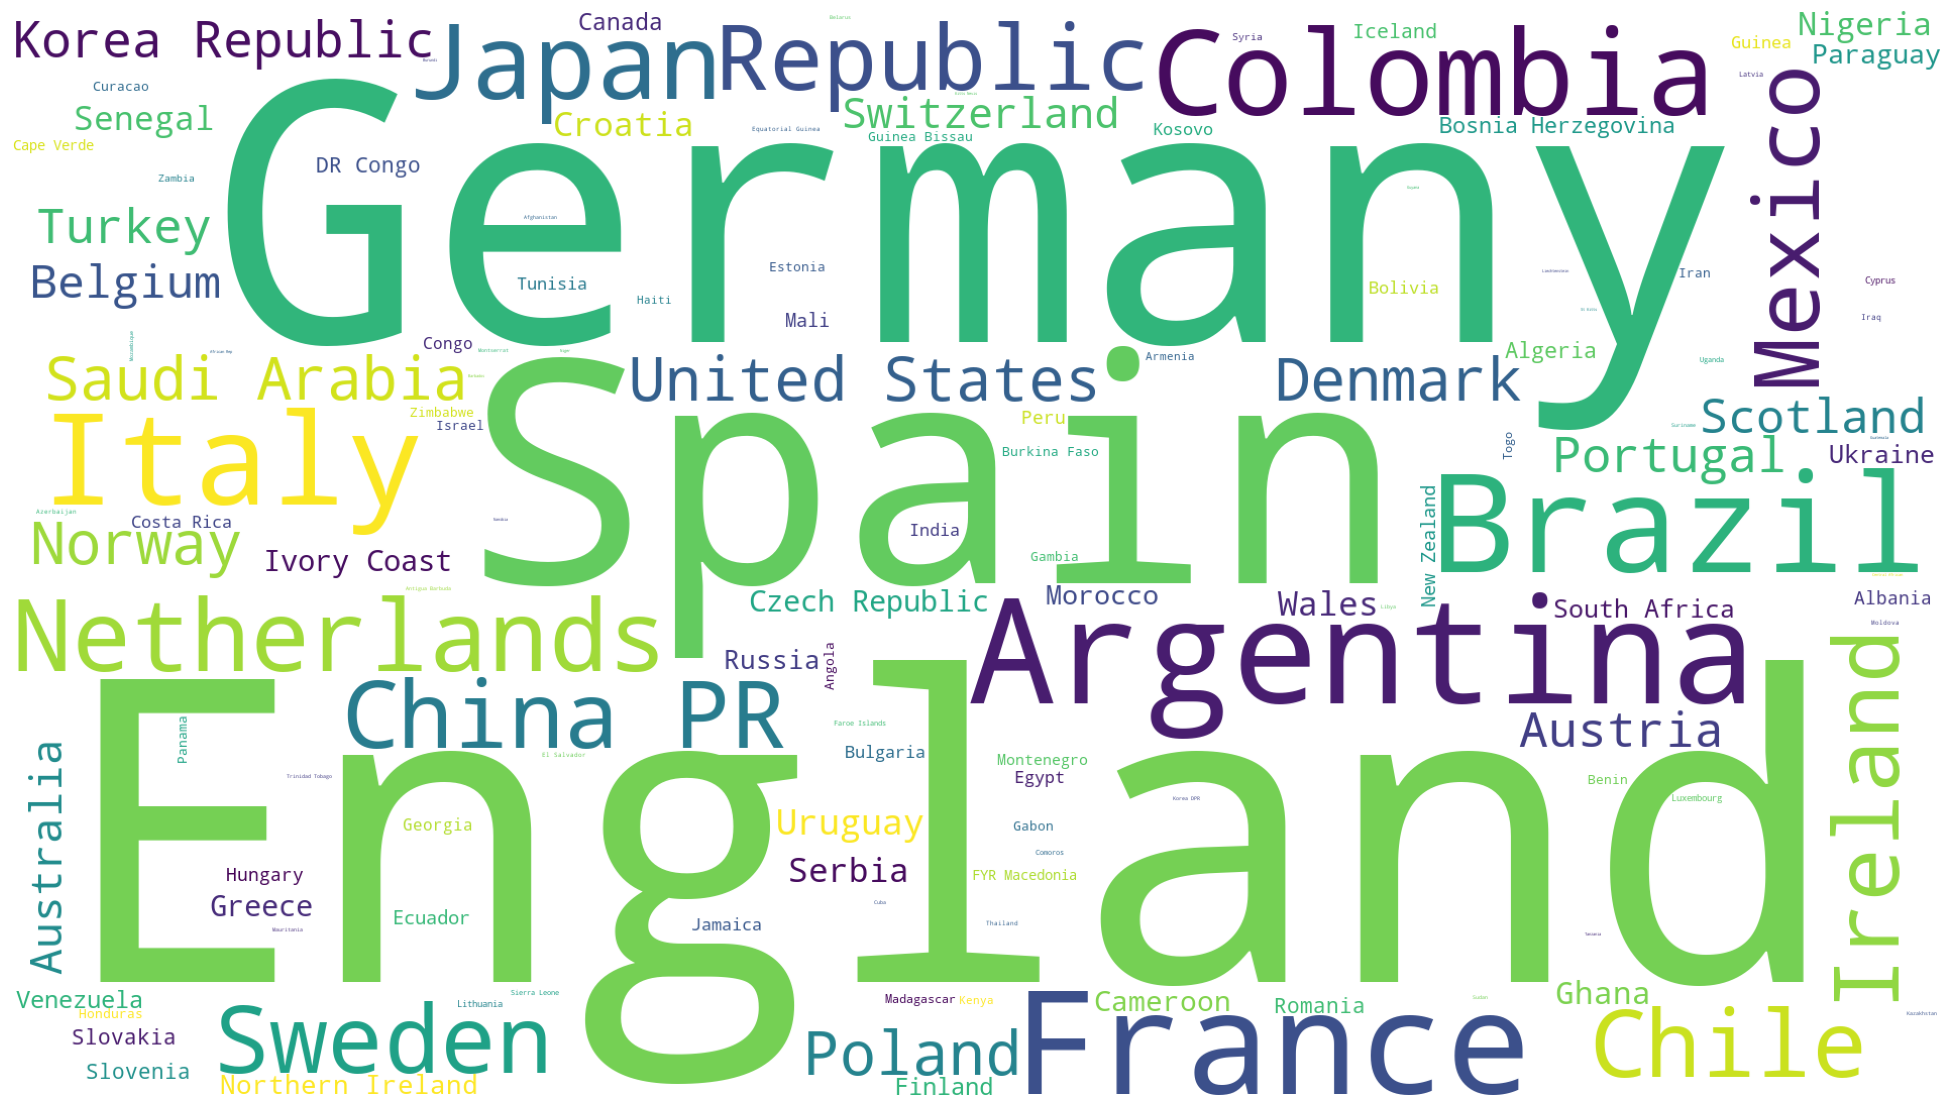

In [30]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(fifa.Nationality))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [27]:
# type(fifa.Nationality)

In [28]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [29]:
body_first = fifa.loc[:100,'Body Type']

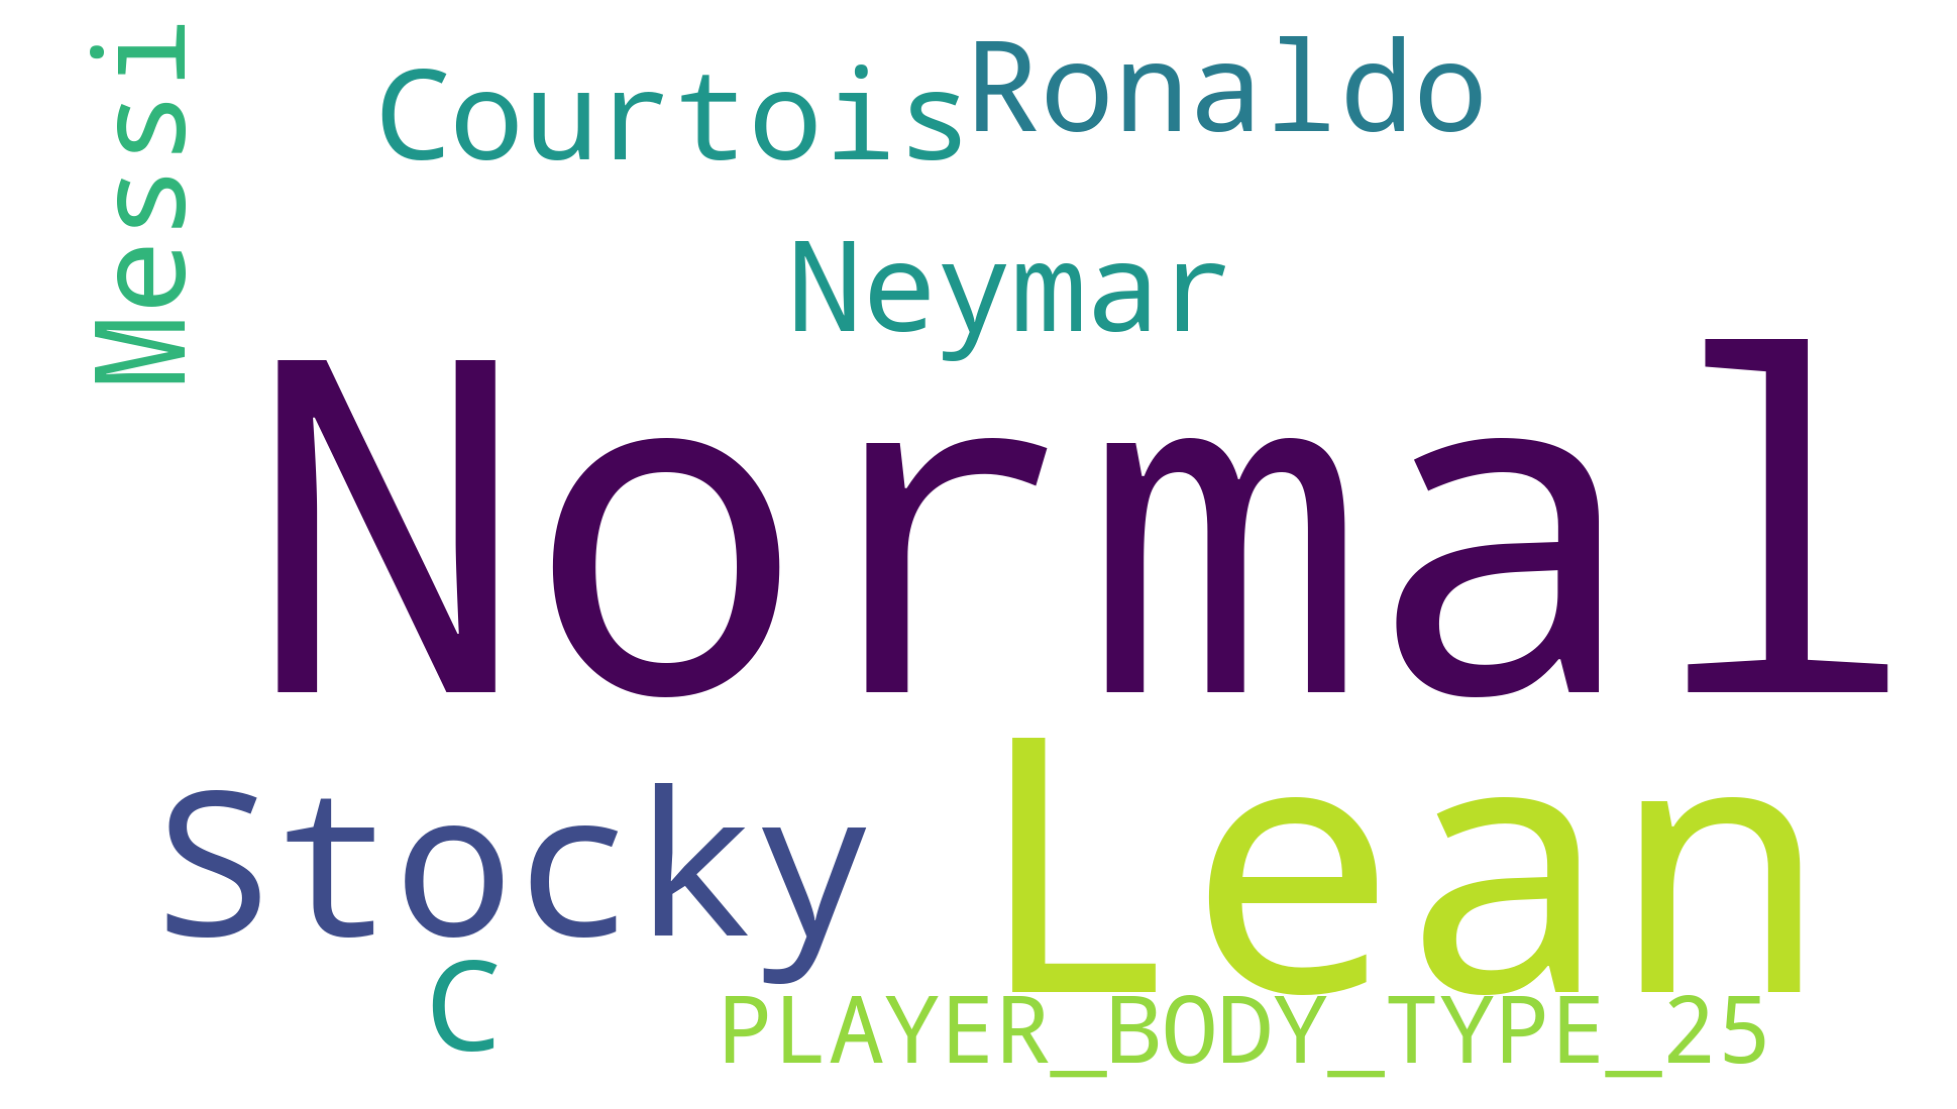

In [65]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(body_first))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [52]:
fifa_club = fifa.loc[:100,"Club"]
type(fifa_club)

pandas.core.series.Series

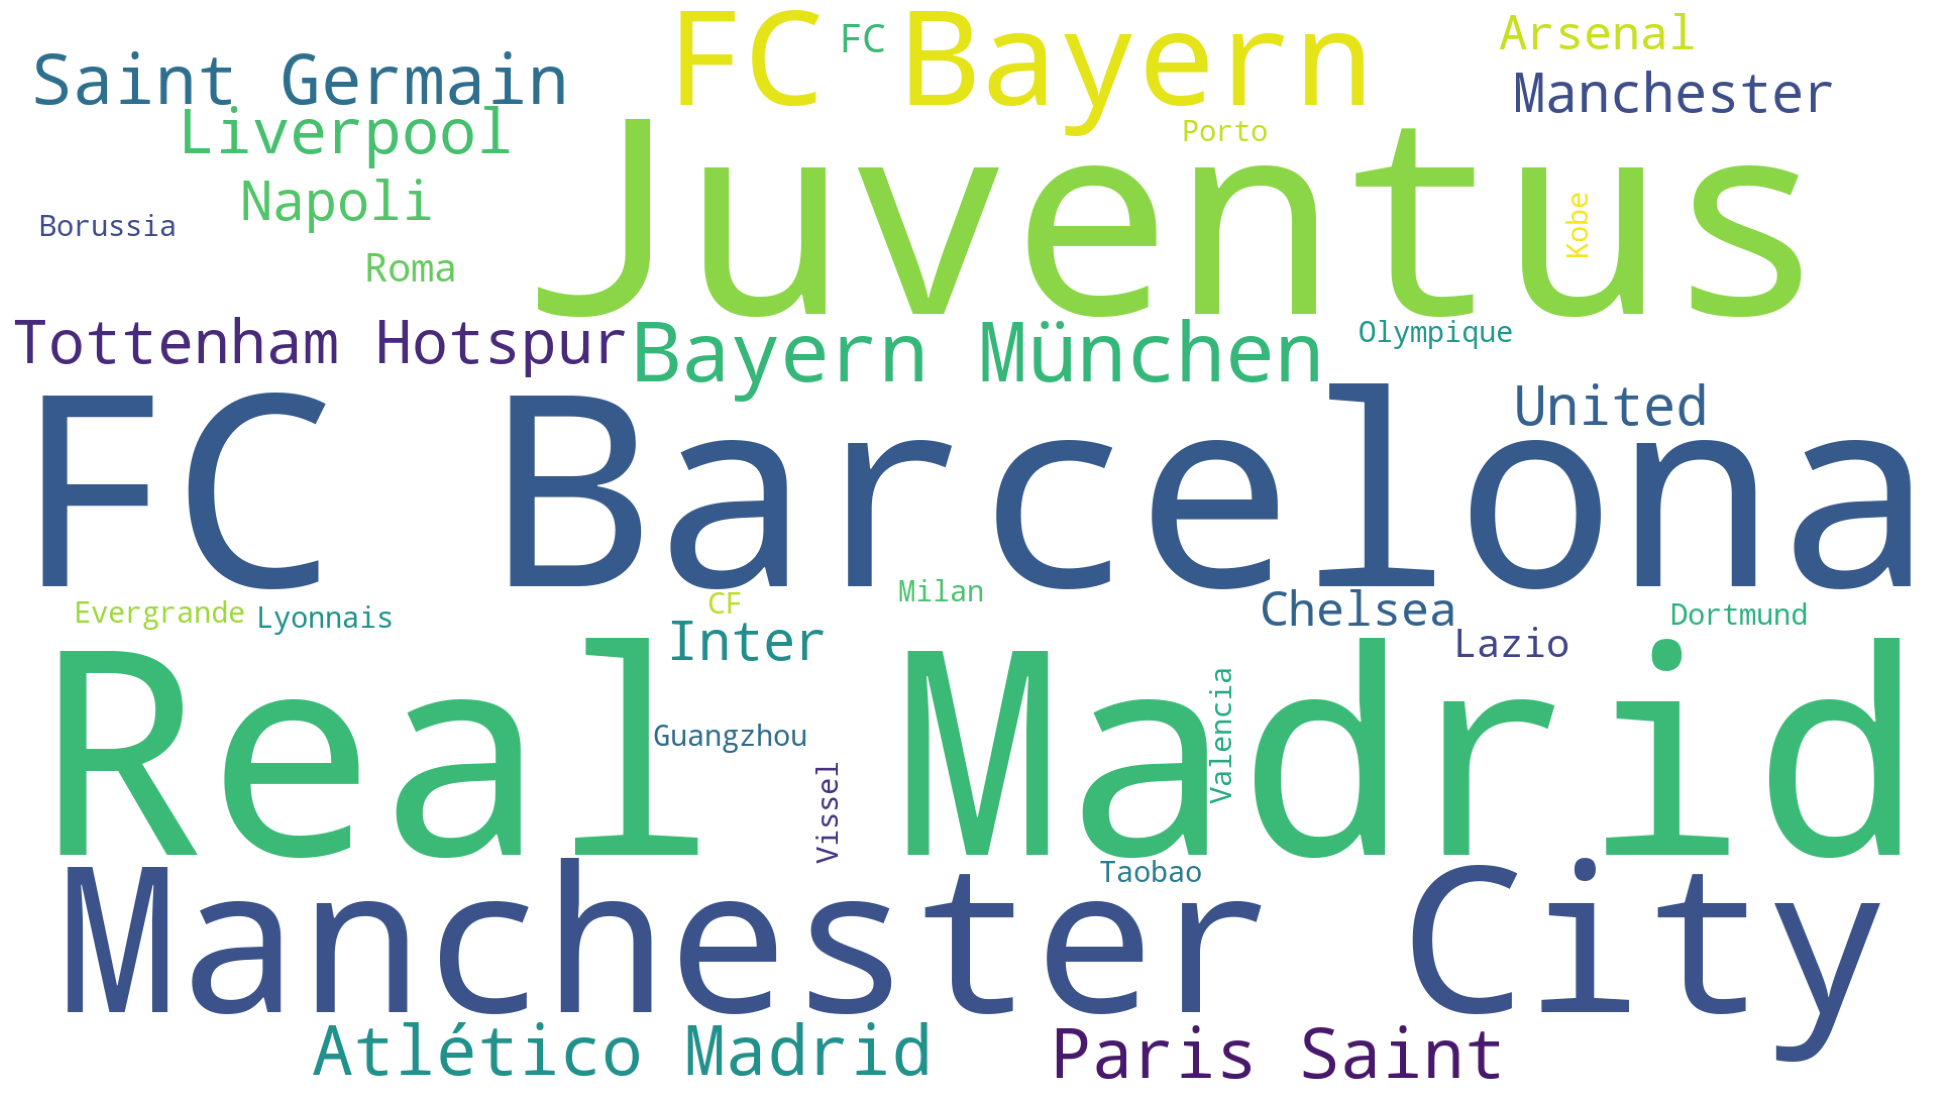

In [57]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(fifa_club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

__In the next few steps we'll be imputing the missing values from the dataset. As the dataset containes a lot of rows, we won't repeatedly show all the imputations. Instead, we will show the final dataset after all the imputations to establish that we have achived a dataset which doesn't have any missing values__

1-Remove the feature
2-Remove the data points
3-imputing (Average,median,mode)

In [73]:
fifa['Club'].isnull().sum()

0

In [72]:
fifa['Position'].isnull().sum()

0

In [70]:
fifa['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [71]:
#Imputing the missing values for the columns Club and Position
fifa['Club'].fillna('No Club', inplace = True)
fifa['Position'].fillna('ST', inplace = True)

In [78]:
# selecting columns to impute the missing values by mean
to_impute_by_mean = fifa.loc[:, ['Crossing', 'Finishing', 'HeadingAccuracy',
                                 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy',
                                 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed',
                                 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping',
                                 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions',
                                 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking',
                                 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
                                 'GKKicking', 'GKPositioning', 'GKReflexes']]

In [80]:
to_impute_by_mean.columns

Index(['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'],
      dtype='object')

In [77]:
import numpy as np
np.mean(fifa['Crossing'])

49.734181397654055

In [83]:
fifa['Crossing'].mean()

49.734181397654055

In [85]:
# replacing the missing values with mean
for i in to_impute_by_mean.columns:
    fifa[i].fillna(fifa[i].mean(), inplace = True)

In [87]:
fifa.GKHandling.isnull().sum()

0

In [100]:
'''These are categorical variables and will be imputed by mode.'''
to_impute_by_mode = fifa.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
for i in to_impute_by_mode.columns:
    fifa[i].fillna(fifa[i].mode()[0], inplace = True)

In [106]:
# to_impute_by_mode['Body Type'].mean()

In [99]:
fifa['Body Type'].mode()[0]

'Normal'

In [89]:
# fifa.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]

In [107]:
fifa['International Reputation'].isnull().sum()

0

In [76]:
to_impute_by_mode = fifa.loc[:, ['Body Type','International Reputation', 'Height', 'Weight', 'Preferred Foot','Jersey Number']]
to_impute_by_mode

Body Type  International Reputation Height  Weight Preferred Foot  \
0           Messi                       5.0    5'7  159lbs           Left   
1      C. Ronaldo                       5.0    6'2  183lbs          Right   
2          Neymar                       5.0    5'9  150lbs          Right   
3            Lean                       4.0    6'4  168lbs          Right   
4          Normal                       4.0   5'11  154lbs          Right   
...           ...                       ...    ...     ...            ...   
18202        Lean                       1.0    5'9  134lbs          Right   
18203      Normal                       1.0    6'3  170lbs          Right   
18204      Normal                       1.0    5'8  148lbs          Right   
18205        Lean                       1.0   5'10  154lbs          Right   
18206        Lean                       1.0   5'10  176lbs          Right   

       Jersey Number  
0               10.0  
1                7.0  
2               10.0  
3                1.0  
4                7.0  
...              ...  
18202           22.0  
18203           21.0  
18204           33.0  
18205           34.0  
18206           33.0  

[18207 rows x 6 columns]

In [113]:
'''The following variables are either discrete numerical or continuous numerical variables.So the will be imputed by median.'''
to_impute_by_median = fifa.loc[:, ['Weak Foot', 'Skill Moves', ]]
for i in to_impute_by_median.columns:
    fifa[i].fillna(fifa[i].median(), inplace = True)

In [111]:
fifa['Skill Moves'].unique()

array([ 4.,  5.,  1.,  3.,  2., nan])

In [78]:
fifa.loc[:, ['Weak Foot', 'Skill Moves', ]]

Weak Foot  Skill Moves
0            4.0          4.0
1            4.0          5.0
2            5.0          5.0
3            3.0          1.0
4            5.0          4.0
...          ...          ...
18202        2.0          2.0
18203        2.0          2.0
18204        3.0          2.0
18205        3.0          2.0
18206        3.0          2.0

[18207 rows x 2 columns]

In [114]:
fifa['Weak Foot'].isnull().sum()

0

In [115]:
fifa.head(20)

ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
12  https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
13  https://cdn.sofifa.org/players/4/19/168542.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
17  https://cdn.sofifa.org/players/4/19/194765.png      France   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   
12  https://cdn.sofifa.org/flags/60.png       90         90   
13  https://cdn.sofifa.org/flags/45.png       90         90   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   
17  https://cdn.sofifa.org/flags/18.png       89         90   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   

                   Club                                     Club Logo  ...  \
0          FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1              Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3     Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4       Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
5               Chelsea    htt

In [81]:
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1564
Length: 89, dtype: int64

In [116]:
'''Columns remaining to be imputed'''
fifa.columns[fifa.isna().any()]

Index(['Work Rate', 'Real Face', 'Joined', 'Loaned From',
       'Contract Valid Until', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Release Clause'],
      dtype='object')

In [117]:
fifa.isnull().sum()

ID                   0
Name                 0
Age                  0
Photo                0
Nationality          0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1564
Length: 88, dtype: int64

In [118]:
fifa.fillna(0, inplace = True) # Filling the remaining  missing values with zero
fifa.head(20)

ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
12  https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
13  https://cdn.sofifa.org/players/4/19/168542.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
17  https://cdn.sofifa.org/players/4/19/194765.png      France   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   
12  https://cdn.sofifa.org/flags/60.png       90         90   
13  https://cdn.sofifa.org/flags/45.png       90         90   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   
17  https://cdn.sofifa.org/flags/18.png       89         90   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   

                   Club                                     Club Logo  ...  \
0          FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1              Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3     Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4       Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
5               Chelsea    htt

In [119]:
fifa.columns[fifa.isna().any()]

Index([], dtype='object')

In [121]:
fifa.isnull().sum()

ID                0
Name              0
Age               0
Photo             0
Nationality       0
                 ..
GKHandling        0
GKKicking         0
GKPositioning     0
GKReflexes        0
Release Clause    0
Length: 88, dtype: int64

## Feature Engineering

In [123]:
# functions to get the rounded values from different columns
def defending(data):
    return int(round((data[['Marking', 'StandingTackle', 
                               'SlidingTackle']].mean()).mean()))

def general(data):
    return int(round((data[['HeadingAccuracy', 'Dribbling', 'Curve', 
                               'BallControl']].mean()).mean()))

def mental(data):
    return int(round((data[['Aggression', 'Interceptions', 'Positioning', 
                               'Vision','Composure']].mean()).mean()))

def passing(data):
    return int(round((data[['Crossing', 'ShortPassing', 
                               'LongPassing']].mean()).mean()))

def mobility(data):
    return int(round((data[['Acceleration', 'SprintSpeed', 
                               'Agility','Reactions']].mean()).mean()))
def power(data):
    return int(round((data[['Balance', 'Jumping', 'Stamina', 
                               'Strength']].mean()).mean()))

def rating(data):
    return int(round((data[['Potential', 'Overall']].mean()).mean()))

def shooting(data):
    return int(round((data[['Finishing', 'Volleys', 'FKAccuracy', 
                               'ShotPower','LongShots', 'Penalties']].mean()).mean()))

In [124]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [125]:
fifa.GKHandling

0        11.0
1        11.0
2         9.0
3        85.0
4        13.0
         ... 
18202    13.0
18203     9.0
18204     5.0
18205     6.0
18206    15.0
Name: GKHandling, Length: 18207, dtype: float64

In [126]:
# renaming a column
fifa.rename(columns={'Club Logo':'Club_Logo'}, inplace=True)

In [127]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

In [130]:
# adding these categories to the data

fifa['Defending'] = fifa.apply(defending, axis = 1)
fifa['General'] = fifa.apply(general, axis = 1)
fifa['Mental'] = fifa.apply(mental, axis = 1)
fifa['Passing'] = fifa.apply(passing, axis = 1)
fifa['Mobility'] = fifa.apply(mobility, axis = 1)
fifa['Power'] = fifa.apply(power, axis = 1)
fifa['Rating'] = fifa.apply(rating, axis = 1)
fifa['Shooting'] = fifa.apply(shooting, axis = 1)

In [88]:
fifa.loc[:,'Defending']

0        29
1        27
2        28
3        16
4        59
         ..
18202    45
18203    19
18204    19
18205    24
18206    44
Name: Defending, Length: 18207, dtype: int64

In [128]:
# dataset after transformation
fifa.head(20)

ID               Name  Age  \
0   158023           L. Messi   31   
1    20801  Cristiano Ronaldo   33   
2   190871          Neymar Jr   26   
3   193080             De Gea   27   
4   192985       K. De Bruyne   27   
5   183277          E. Hazard   27   
6   177003          L. Modrić   32   
7   176580          L. Suárez   31   
8   155862       Sergio Ramos   32   
9   200389           J. Oblak   25   
10  188545     R. Lewandowski   29   
11  182521           T. Kroos   28   
12  182493           D. Godín   32   
13  168542        David Silva   32   
14  215914           N. Kanté   27   
15  211110          P. Dybala   24   
16  202126            H. Kane   24   
17  194765       A. Griezmann   27   
18  192448      M. ter Stegen   26   
19  192119        T. Courtois   26   

                                             Photo Nationality  \
0   https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1    https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2   https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4   https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
9   https://cdn.sofifa.org/players/4/19/200389.png    Slovenia   
10  https://cdn.sofifa.org/players/4/19/188545.png      Poland   
11  https://cdn.sofifa.org/players/4/19/182521.png     Germany   
12  https://cdn.sofifa.org/players/4/19/182493.png     Uruguay   
13  https://cdn.sofifa.org/players/4/19/168542.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
17  https://cdn.sofifa.org/players/4/19/194765.png      France   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
19  https://cdn.sofifa.org/players/4/19/192119.png     Belgium   

                                   Flag  Overall  Potential  \
0   https://cdn.sofifa.org/flags/52.png       94         94   
1   https://cdn.sofifa.org/flags/38.png       94         94   
2   https://cdn.sofifa.org/flags/54.png       92         93   
3   https://cdn.sofifa.org/flags/45.png       91         93   
4    https://cdn.sofifa.org/flags/7.png       91         92   
5    https://cdn.sofifa.org/flags/7.png       91         91   
6   https://cdn.sofifa.org/flags/10.png       91         91   
7   https://cdn.sofifa.org/flags/60.png       91         91   
8   https://cdn.sofifa.org/flags/45.png       91         91   
9   https://cdn.sofifa.org/flags/44.png       90         93   
10  https://cdn.sofifa.org/flags/37.png       90         90   
11  https://cdn.sofifa.org/flags/21.png       90         90   
12  https://cdn.sofifa.org/flags/60.png       90         90   
13  https://cdn.sofifa.org/flags/45.png       90         90   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   
17  https://cdn.sofifa.org/flags/18.png       89         90   
18  https://cdn.sofifa.org/flags/21.png       89         92   
19   https://cdn.sofifa.org/flags/7.png       89         90   

                   Club                                     Club_Logo  ...  \
0          FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  ...   
1              Juventus   https://cdn.sofifa.org/teams/2/light/45.png  ...   
2   Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  ...   
3     Manchester United   https://cdn.sofifa.org/teams/2/light/11.png  ...   
4       Manchester City   https://cdn.sofifa.org/teams/2/light/10.png  ...   
5               Chelsea    htt

In [131]:
# creating the players dataset
players = fifa[['Name','Defending','General','Mental','Passing',
                'Mobility','Power','Rating','Shooting','Flag','Age',
                'Nationality', 'Photo', 'Club_Logo', 'Club']]

players.head(20)

Name  Defending  General  Mental  Passing  Mobility  Power  \
0            L. Messi         29       89      71       87        91     74   
1   Cristiano Ronaldo         27       88      73       81        91     83   
2           Neymar Jr         28       85      72       80        94     69   
3              De Gea         16       26      43       39        66     54   
4        K. De Bruyne         59       79      81       92        81     76   
5           E. Hazard         28       83      72       84        92     75   
6           L. Modrić         70       81      80       89        84     77   
7           L. Suárez         48       85      78       74        84     81   
8        Sergio Ramos         90       78      77       74        78     82   
9            J. Oblak         19       14      41       23        64     61   
10     R. Lewandowski         32       84      75       70        81     81   
11           T. Kroos         73       78      78       91        71     62   
12           D. Godín         89       68      72       68        70     75   
13        David Silva         47       80      76       88        79     71   
14           N. Kanté         89       66      83       78        84     85   
15          P. Dybala         21       85      67       81        87     76   
16            H. Kane         43       82      75       79        76     80   
17       A. Griezmann         51       86      73       80        88     79   
18      M. ter Stegen         16       16      43       31        52     59   
19        T. Courtois         18       17      32       27        61     55   

    Rating  Shooting                                 Flag  Age Nationality  \
0       94        88  https://cdn.sofifa.org/flags/52.png   31   Argentina   
1       94        88  https://cdn.sofifa.org/flags/38.png   33    Portugal   
2       92        84  https://cdn.sofifa.org/flags/54.png   26      Brazil   
3       92        21  https://cdn.sofifa.org/flags/45.png   27       Spain   
4       92        85   https://cdn.sofifa.org/flags/7.png   27     Belgium   
5       91        82   https://cdn.sofifa.org/flags/7.png   27     Belgium   
6       91        78  https://cdn.sofifa.org/flags/10.png   32     Croatia   
7       91        87  https://cdn.sofifa.org/flags/60.png   31     Uruguay   
8       91        68  https://cdn.sofifa.org/flags/45.png   32       Spain   
9       92        14  https://cdn.sofifa.org/flags/44.png   25    Slovenia   
10      90        88  https://cdn.sofifa.org/flags/37.png   29      Poland   
11      90        82  https://cdn.sofifa.org/flags/21.png   28     Germany   
12      90        50  https://cdn.sofifa.org/flags/60.png   32     Uruguay   
13      90        76  https://cdn.sofifa.org/flags/45.png   32       Spain   
14      90        61  https://cdn.sofifa.org/flags/18.png   27      France   
15      92        86  https://cdn.sofifa.org/flags/52.png   24   Argentina   
16      90        85  https://cdn.sofifa.org/flags/14.png   24     England   
17      90        83  https://cdn.sofifa.org/flags/18.png   27      France   
18      90        16  https://cdn.sofifa.org/flags/21.png   26     Germany   
19      90        21   https://cdn.sofifa.org/flags/7.png   26     Belgium   

                                             Photo  \
0   https://cdn.sofifa.org/players/4/19/158023.png   
1    https://cdn.sofifa.org/players/4/19/20801.png   
2   https://cdn.sofifa.org/players/4/19/190871.png   
3   https://cdn.sofifa.org/players/4/19/193080.png   
4   https://cdn.sofifa.org/players/4/19/192985.png   
5   https://cdn.sofifa.org/players/4/19/183277.png   
6   https://cdn.sofifa.org/players/4/19/177003.png   
7   https://cdn.sofifa.org/players/4/19/176580.png   
8   https://cdn.sofifa.org/players/4/19/155862.png   
9   https://cdn.sofifa.org/players/4/19/200389.png   
10  https://cdn.sofifa.org/players/4/19/188545.png   
11  https://cdn.sofifa.org/players/4/19/182521.png   
12  https://cdn.

In [143]:
# different positions acquired by the players 

plt.figure(figsize = (18, 8))
plt.style.use('fivethirtyeight')
ax = sns.countplot(fifa['Position'])
ax.set_xlabel(xlabel = 'Different Positions in Football', fontsize = 16)
ax.set_ylabel(ylabel = 'Count of Players', fontsize = 16)
ax.set_title(label = 'Comparison of Positions and Players', fontsize = 20)
plt.show()

ValueError: could not convert string to float: 'RF'

<Figure size 1800x800 with 0 Axes>

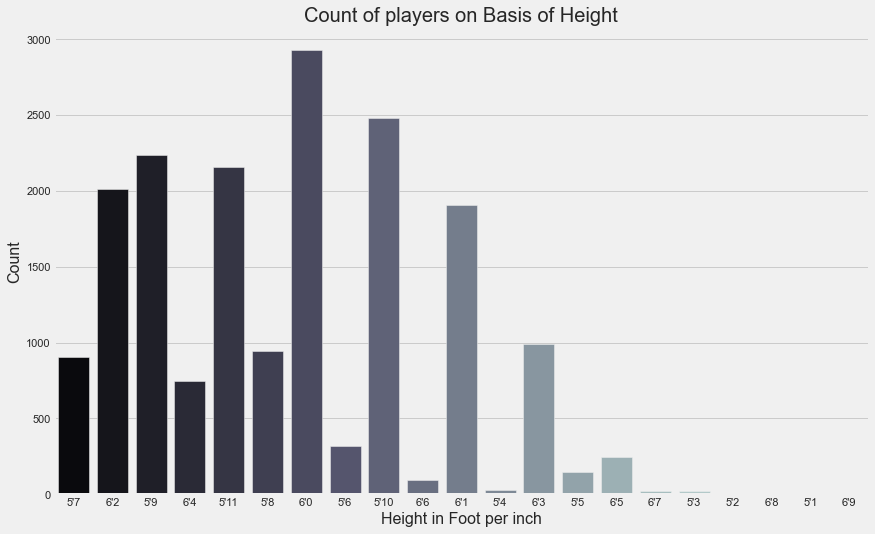

In [92]:
# plotting count of players based on their heights
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = fifa, palette = 'bone')
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per inch', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()


In [149]:
fifa['Height'].unique()

array(["5'7", "6'2", "5'9", "6'4", "5'11", "5'8", "6'0", "5'6", "5'10",
       "6'6", "6'1", "5'4", "6'3", "5'5", "6'5", "6'7", "5'3", "5'2",
       "6'8", "5'1", "6'9"], dtype=object)

In [154]:
five_seven=fifa[fifa['Height']=="5'7"]

In [156]:
# five_seven

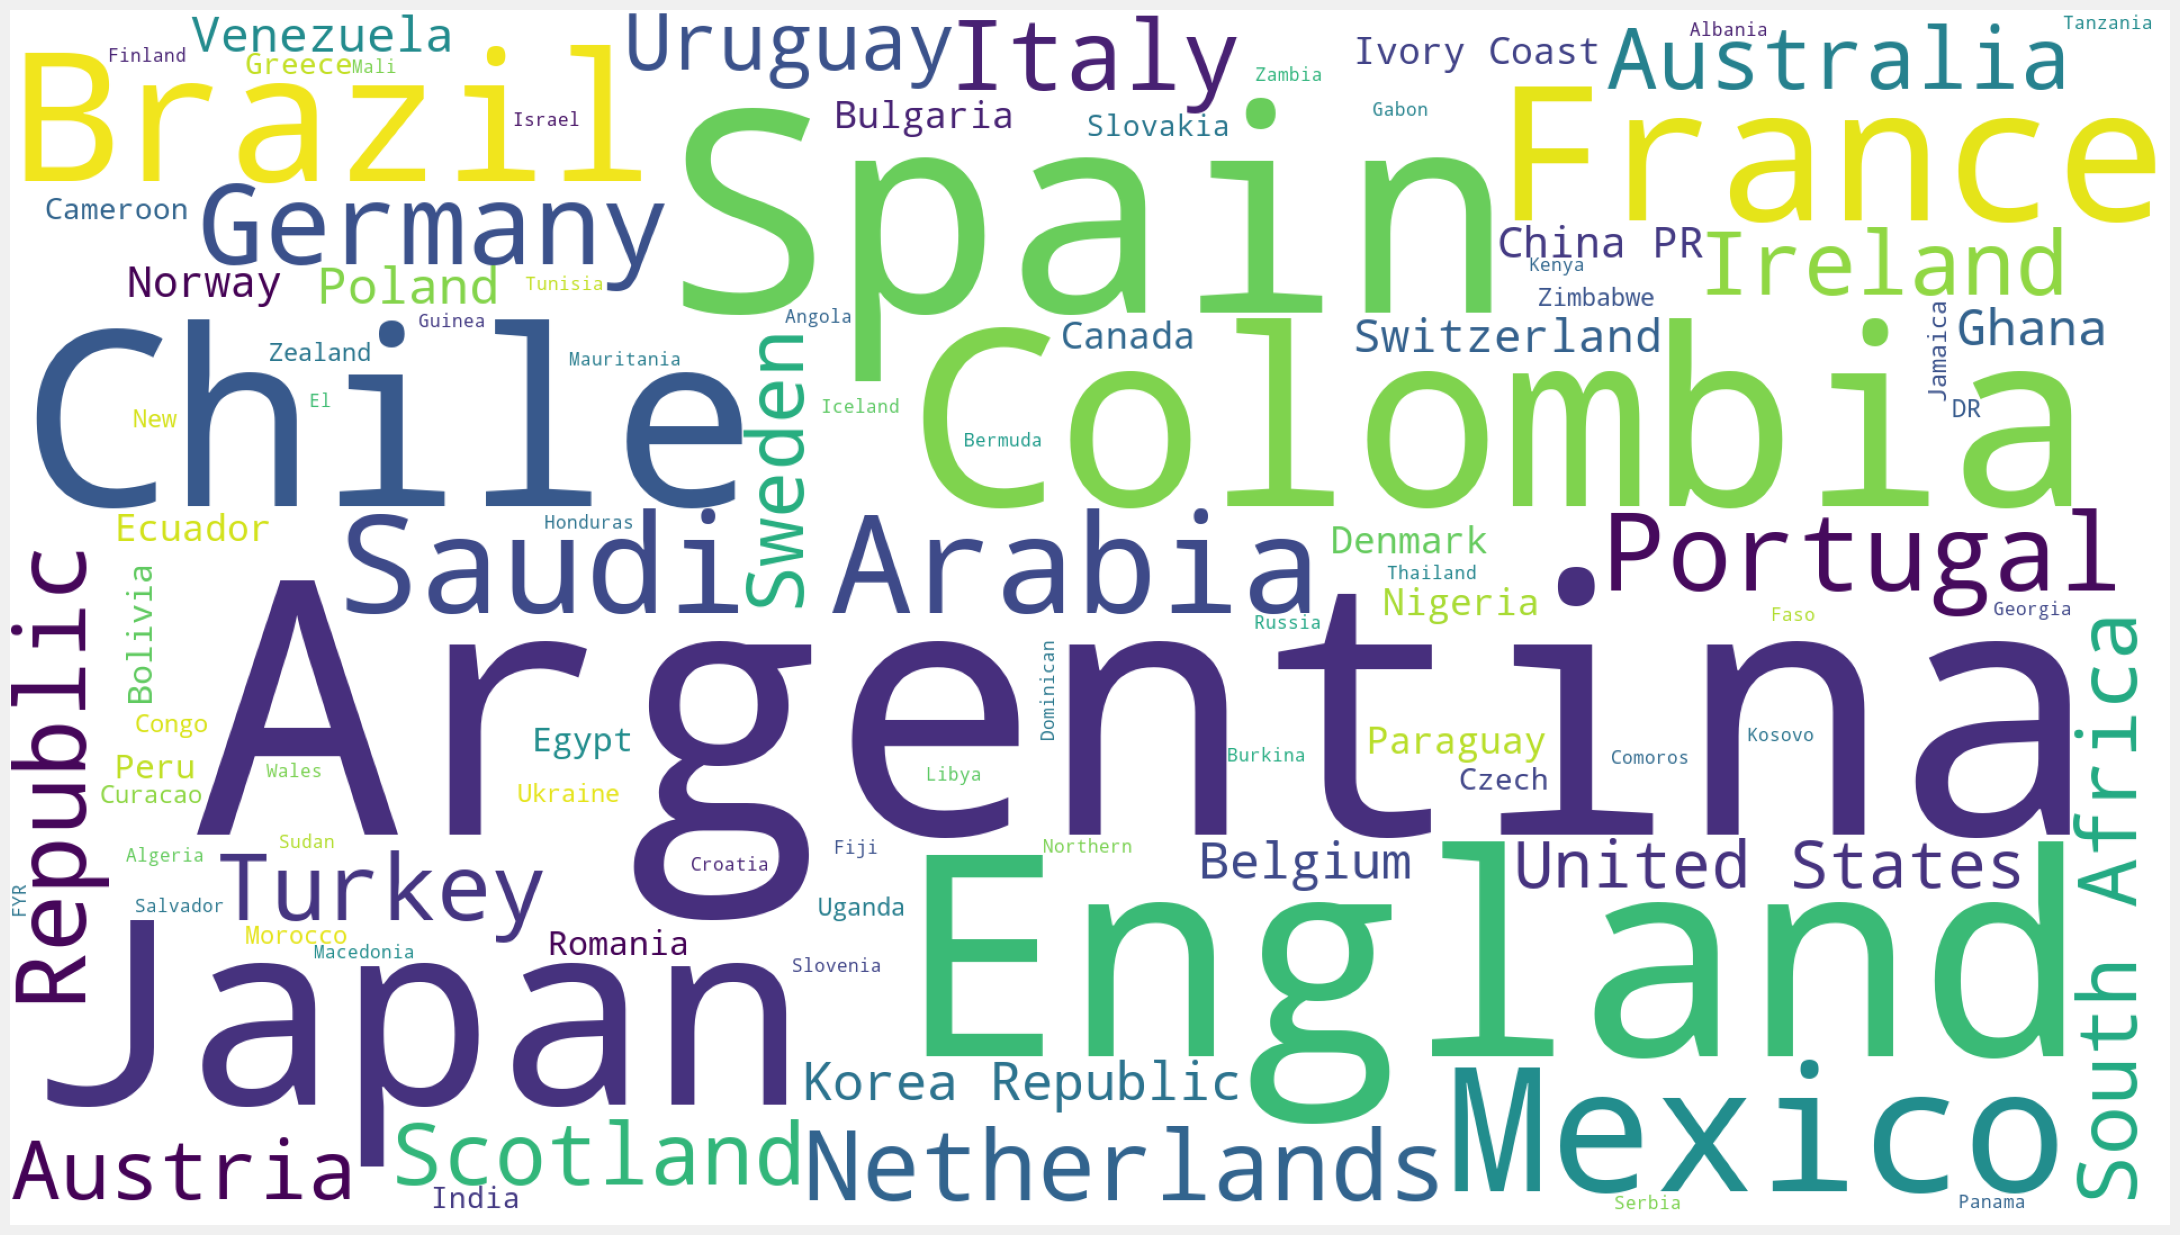

In [159]:
# Plotiing the wordcloud for the Nationalit column
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                           width=1920,
                          height=1080
                         ).generate(" ".join(five_seven['Nationality']))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')
plt.show()

In [1]:
# To show Different Work rate of the players participating in the FIFA 2019

plt.figure(figsize = (15, 7))
plt.style.use('_classic_test')

sns.countplot(x = 'Work Rate', data = fifa, palette = 'hls')
plt.title('Different work rates of the Players Participating in the FIFA 2019', fontsize = 20)
plt.xlabel('Work rates associated with the players', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()


NameError: name 'plt' is not defined

In [46]:

# x = fifa.Special
# plt.figure(figsize = (12, 8))
# plt.style.use('tableau-colorblind10')

# ax = sns.distplot(x, bins = 58, kde = False, color = 'cyan')
# ax.set_xlabel(xlabel = 'Special score range', fontsize = 16)
# ax.set_ylabel(ylabel = 'Count of the Players',fontsize = 16)
# ax.set_title(label = 'Histogram for the Speciality Scores of the Players', fontsize = 20)
# plt.show()

In [94]:
# Every Nations' Player and their overall scores

some_countries = ('England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy', 'Columbia') # defining a tuple consisting of country names
data_countries = fifa.loc[fifa['Nationality'].isin(some_countries) & fifa['Overall']] # extracting the overall data of the countries selected in the line above
data_countries.head()



Unnamed: 0      ID          Name  Age  \
3            3  193080        De Gea   27   
8            8  155862  Sergio Ramos   32   
14          14  215914      N. Kanté   27   
15          15  211110     P. Dybala   24   
16          16  202126       H. Kane   24   

                                             Photo Nationality  \
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   

                                   Flag  Overall  Potential  \
3   https://cdn.sofifa.org/flags/45.png       91         93   
8   https://cdn.sofifa.org/flags/45.png       91         91   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   

                 Club                                     Club_Logo   Value  \
3   Manchester United   https://cdn.sofifa.org/teams/2/light/11.png    €72M   
8         Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png    €51M   
14            Chelsea    https://cdn.sofifa.org/teams/2/light/5.png    €63M   
15           Juventus   https://cdn.sofifa.org/teams/2/light/45.png    €89M   
16  Tottenham Hotspur   https://cdn.sofifa.org/teams/2/light/18.png  €83.5M   

     Wage  Special Preferred Foot  International Reputation  Weak Foot  \
3   €260K     1471          Right                       4.0        3.0   
8   €380K     2201          Right                       4.0        3.0   
14  €225K     2189          Right                       3.0        3.0   
15  €205K     2092           Left                       3.0        3.0   
16  €205K     2165          Right                       3.0        4.0   

    Skill Moves       Work Rate Body Type Real Face Position  Jersey Number  \
3           1.0  Medium/ Medium      Lean       Yes       GK            1.0   
8           3.0    High/ Medium    Normal       Yes      RCB           15.0   
14          2.0    Medium/ High      Lean       Yes      LDM           13.0   
15          4.0    High/ Medium    Normal       Yes       LF           21.0   
16          3.0      High/ High    Normal       Yes       ST            9.0   

          Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
3    Jul 1, 2011           0                 2020    6'4  168lbs     0     0   
8    Aug 1, 2005           0                 2020    6'0  181lbs  73+3  73+3   
14  Jul 16, 2016           0                 2023    5'6  159lbs  72+3  72+3   
15   Jul 1, 2015           0                 2022   5'10  165lbs  83+3  83+3   
16   Jul 1, 2010           0                 2024    6'2  196lbs  86+3  86+3   

      RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
3      0     0     0     0     0     0     0     0     0     0     0     0   
8   73+3  70+3  71+3  71+3  71+3  70+3  71+3  71+3  71+3  72+3  75+3  75+3   
14  72+3  77+3  77+3  77+3  77+3  77+3  79+3  79+3  79+3  79+3  82+3  82+3   
15  83+3  87+3  86+3  86+3  86+3  87+3  87+3  87+3  87+3  86+3  79+3  79+3   
16  86+3  82+3  84+3  84+3  84+3  82+3  82+3  82+3  82+3  81+3  79+3  79+3   

     RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
3      0     0     0     0     0     0     0     0     0     0     0     0   
8   75+3  72+3  81+3  84+3  84+3  84+3  81+3  84+3  87+3  87+3  87+3  84+3   
14  82+3  79+3  85+3  87+3  87+3  87+3  85+3  84+3  83+3  83+3  83+3  84+3   
15  79+3  86+3  62+3  58+3  58+3  58+3  62+3  56+3  45+3  45+3  45+3  56+3   
16  79+3  81+3  65+3  66+3  66+3  66+3  65+3  62+3  60+3  60+3  60+3  62+3   

    Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
3       17.0       13.0             21.0          50.0     13.0  

In [95]:
data_countries.head(20)

Unnamed: 0      ID             Name  Age  \
3            3  193080           De Gea   27   
8            8  155862     Sergio Ramos   32   
14          14  215914         N. Kanté   27   
15          15  211110        P. Dybala   24   
16          16  202126          H. Kane   24   
17          17  194765     A. Griezmann   27   
18          18  192448    M. ter Stegen   26   
20          20  189511  Sergio Busquets   29   
22          22  167495         M. Neuer   32   
23          23  153079        S. Agüero   30   
24          24  138956     G. Chiellini   33   
42          42  205600        S. Umtiti   24   
43          43  201399        M. Icardi   25   
45          45  195864         P. Pogba   25   
48          48  192387      C. Immobile   28   
49          49  189332       Jordi Alba   29   
54          54  152729            Piqué   31   
79          79  220834    Marco Asensio   22   
80          80  216594         N. Fekir   24   
81          81  212831          Alisson   25   

                                             Photo Nationality  \
3   https://cdn.sofifa.org/players/4/19/193080.png       Spain   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   
15  https://cdn.sofifa.org/players/4/19/211110.png   Argentina   
16  https://cdn.sofifa.org/players/4/19/202126.png     England   
17  https://cdn.sofifa.org/players/4/19/194765.png      France   
18  https://cdn.sofifa.org/players/4/19/192448.png     Germany   
20  https://cdn.sofifa.org/players/4/19/189511.png       Spain   
22  https://cdn.sofifa.org/players/4/19/167495.png     Germany   
23  https://cdn.sofifa.org/players/4/19/153079.png   Argentina   
24  https://cdn.sofifa.org/players/4/19/138956.png       Italy   
42  https://cdn.sofifa.org/players/4/19/205600.png      France   
43  https://cdn.sofifa.org/players/4/19/201399.png   Argentina   
45  https://cdn.sofifa.org/players/4/19/195864.png      France   
48  https://cdn.sofifa.org/players/4/19/192387.png       Italy   
49  https://cdn.sofifa.org/players/4/19/189332.png       Spain   
54  https://cdn.sofifa.org/players/4/19/152729.png       Spain   
79  https://cdn.sofifa.org/players/4/19/220834.png       Spain   
80  https://cdn.sofifa.org/players/4/19/216594.png      France   
81  https://cdn.sofifa.org/players/4/19/212831.png      Brazil   

                                   Flag  Overall  Potential  \
3   https://cdn.sofifa.org/flags/45.png       91         93   
8   https://cdn.sofifa.org/flags/45.png       91         91   
14  https://cdn.sofifa.org/flags/18.png       89         90   
15  https://cdn.sofifa.org/flags/52.png       89         94   
16  https://cdn.sofifa.org/flags/14.png       89         91   
17  https://cdn.sofifa.org/flags/18.png       89         90   
18  https://cdn.sofifa.org/flags/21.png       89         92   
20  https://cdn.sofifa.org/flags/45.png       89         89   
22  https://cdn.sofifa.org/flags/21.png       89         89   
23  https://cdn.sofifa.org/flags/52.png       89         89   
24  https://cdn.sofifa.org/flags/27.png       89         89   
42  https://cdn.sofifa.org/flags/18.png       87         92   
43  https://cdn.sofifa.org/flags/52.png       87         90   
45  https://cdn.sofifa.org/flags/18.png       87         91   
48  https://cdn.sofifa.org/flags/27.png       87         87   
49  https://cdn.sofifa.org/flags/45.png       87         87   
54  https://cdn.sofifa.org/flags/45.png       87         87   
79  https://cdn.sofifa.org/flags/45.png       85         92   
80  https://cdn.sofifa.org/flags/18.png       85         89   
81  https://cdn.sofifa.org/flags/54.png       85         90   

                  Club                                     Club_Logo   Value  \
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png    €72M   
8          Real Madrid  https://cdn.sofifa.org/teams/2/light/243.png    €51M   
14             Chelsea    https://cdn.sofifa

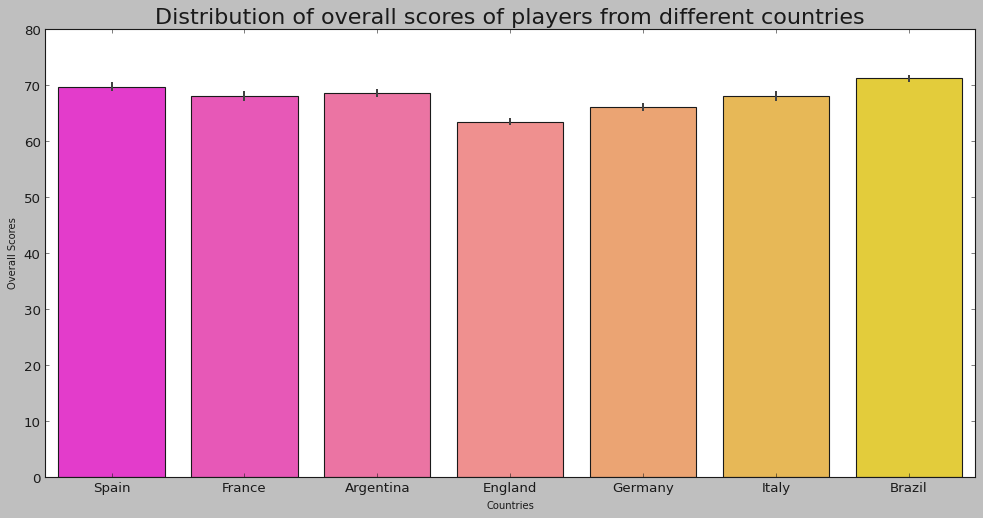

In [96]:
plt.rcParams['figure.figsize'] = (15, 7)
ax = sns.barplot(x = data_countries['Nationality'], y = data_countries['Overall'], palette = 'spring') # creating a bargraph
ax.set_xlabel(xlabel = 'Countries', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Scores', fontsize = 9)
ax.set_title(label = 'Distribution of overall scores of players from different countries', fontsize = 20)
plt.show()

In [98]:
fifa['Club'].value_counts().head(10) # finding the number of players in each club

No Club                    241
Rayo Vallecano              33
Real Madrid                 33
Atlético Madrid             33
Tottenham Hotspur           33
Empoli                      33
Borussia Dortmund           33
Arsenal                     33
Chelsea                     33
Wolverhampton Wanderers     33
Name: Club, dtype: int64

In [99]:
data = fifa.copy() # creating a copy dataset

In [100]:
# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(style="ticks")

In [101]:
some_clubs = ('CD Leganés', 'Southampton', 'RC Celta', 'Empoli', 'Fortuna Düsseldorf', 'Manchestar City',
             'Tottenham Hotspur', 'FC Barcelona', 'Valencia CF', 'Chelsea', 'Real Madrid') # creating a tuple of club names

data_clubs = data.loc[data['Club'].isin(some_clubs) & data['Overall']] # extracting the overall data of the clubs selected in the line above

data_clubs.head()

Unnamed: 0      ID          Name  Age  \
5            5  183277     E. Hazard   27   
6            6  177003     L. Modrić   32   
7            7  176580     L. Suárez   31   
8            8  155862  Sergio Ramos   32   
14          14  215914      N. Kanté   27   

                                             Photo Nationality  \
5   https://cdn.sofifa.org/players/4/19/183277.png     Belgium   
6   https://cdn.sofifa.org/players/4/19/177003.png     Croatia   
7   https://cdn.sofifa.org/players/4/19/176580.png     Uruguay   
8   https://cdn.sofifa.org/players/4/19/155862.png       Spain   
14  https://cdn.sofifa.org/players/4/19/215914.png      France   

                                   Flag  Overall  Potential          Club  \
5    https://cdn.sofifa.org/flags/7.png       91         91       Chelsea   
6   https://cdn.sofifa.org/flags/10.png       91         91   Real Madrid   
7   https://cdn.sofifa.org/flags/60.png       91         91  FC Barcelona   
8   https://cdn.sofifa.org/flags/45.png       91         91   Real Madrid   
14  https://cdn.sofifa.org/flags/18.png       89         90       Chelsea   

                                       Club_Logo Value   Wage  Special  \
5     https://cdn.sofifa.org/teams/2/light/5.png  €93M  €340K     2142   
6   https://cdn.sofifa.org/teams/2/light/243.png  €67M  €420K     2280   
7   https://cdn.sofifa.org/teams/2/light/241.png  €80M  €455K     2346   
8   https://cdn.sofifa.org/teams/2/light/243.png  €51M  €380K     2201   
14    https://cdn.sofifa.org/teams/2/light/5.png  €63M  €225K     2189   

   Preferred Foot  International Reputation  Weak Foot  Skill Moves  \
5           Right                       4.0        4.0          4.0   
6           Right                       4.0        4.0          4.0   
7           Right                       5.0        4.0          3.0   
8           Right                       4.0        3.0          3.0   
14          Right                       3.0        3.0          2.0   

       Work Rate Body Type Real Face Position  Jersey Number        Joined  \
5   High/ Medium    Normal       Yes       LF           10.0   Jul 1, 2012   
6     High/ High      Lean       Yes      RCM           10.0   Aug 1, 2012   
7   High/ Medium    Normal       Yes       RS            9.0  Jul 11, 2014   
8   High/ Medium    Normal       Yes      RCB           15.0   Aug 1, 2005   
14  Medium/ High      Lean       Yes      LDM           13.0  Jul 16, 2016   

   Loaned From Contract Valid Until Height  Weight    LS    ST    RS    LW  \
5            0                 2020    5'8  163lbs  83+3  83+3  83+3  89+3   
6            0                 2020    5'8  146lbs  77+3  77+3  77+3  85+3   
7            0                 2021    6'0  190lbs  87+5  87+5  87+5  86+5   
8            0                 2020    6'0  181lbs  73+3  73+3  73+3  70+3   
14           0                 2023    5'6  159lbs  72+3  72+3  72+3  77+3   

      LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM   RCM    RM  \
5   88+3  88+3  88+3  89+3  89+3  89+3  89+3  89+3  82+3  82+3  82+3  89+3   
6   84+3  84+3  84+3  85+3  87+3  87+3  87+3  86+3  88+3  88+3  88+3  86+3   
7   87+5  87+5  87+5  86+5  85+5  85+5  85+5  84+5  79+5  79+5  79+5  84+5   
8   71+3  71+3  71+3  70+3  71+3  71+3  71+3  72+3  75+3  75+3  75+3  72+3   
14  77+3  77+3  77+3  77+3  79+3  79+3  79+3  79+3  82+3  82+3  82+3  79+3   

     LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  Crossing  \
5   66+3  63+3  63+3  63+3  66+3  60+3  49+3  49+3  49+3  60+3      81.0   
6   82+3  81+3  81+3  81+3  82+3  79+3  71+3  71+3  71+3  79+3      86.0   
7   69+5  68+5  68+5  68+5  69+5  66+5  63+5  63+5  63+5  66+5      77.0   
8   81+3  84+3  84+3  84+3  81+3  84+3  87+3  87+3  87+3  84+3      66.0   
14  85+3  87+3  87+3  87+3  85+3  84+3  83+3  83+3  83+3  84+3      68.0   

    Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  Curve  \
5        84.0             61.0          89.0     80.0       95

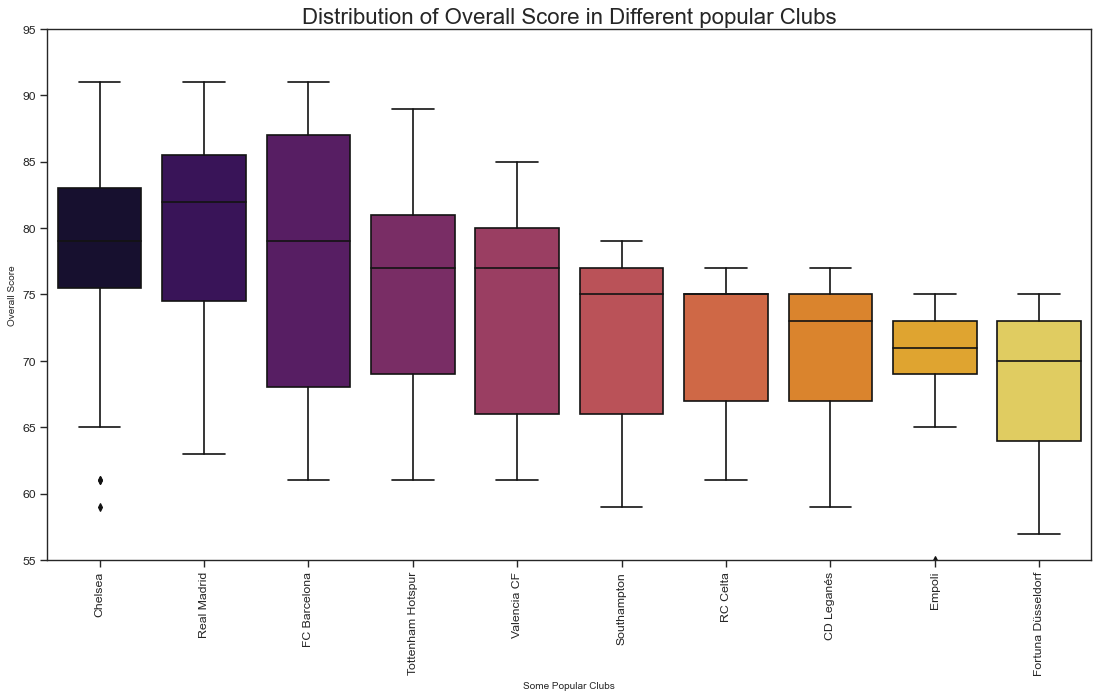

In [102]:
plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(x = data_clubs['Club'], y = data_clubs['Overall'], palette = 'inferno') # creating a boxplot
ax.set_xlabel(xlabel = 'Some Popular Clubs', fontsize = 9)
ax.set_ylabel(ylabel = 'Overall Score', fontsize = 9)
ax.set_title(label = 'Distribution of Overall Score in Different popular Clubs', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

In [103]:
# finding out the top 10 left footed footballers

left = data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)
left

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

In [104]:
# finding out the top 10 Right footed footballers

right = data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)
right

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

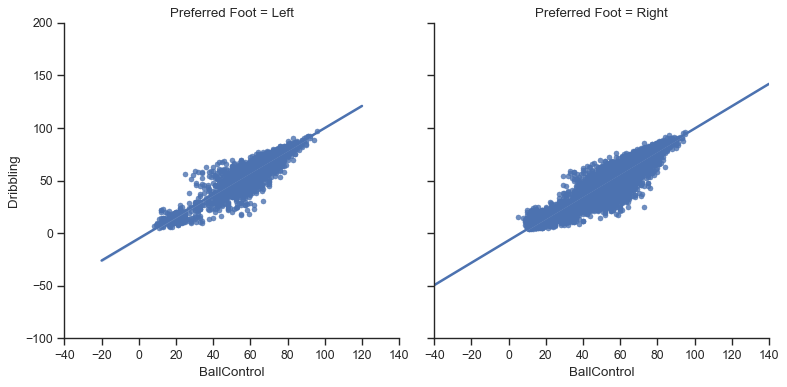

In [59]:
# comparing the performance of left-footed and right-footed footballers
# ballcontrol vs dribbing

sns.lmplot(x = 'BallControl', y = 'Dribbling', data = data, col = 'Preferred Foot')
plt.show()

In [105]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = False).head(10) # checking the clubs where players from the most number of nations play

Club
No Club                   28
Brighton & Hove Albion    21
Fulham                    19
Udinese                   18
Napoli                    18
Empoli                    18
Eintracht Frankfurt       18
West Ham United           18
AS Monaco                 18
Lazio                     18
Name: Nationality, dtype: int64

In [61]:
data.groupby(data['Club'])['Nationality'].nunique().sort_values(ascending = True).head(10) # checking the clubs where players from the least number of nations play

Club
Santos                       1
Ceará Sporting Club          1
América FC (Minas Gerais)    1
Paraná                       1
Chapecoense                  1
Padova                       1
Cittadella                   1
Sangju Sangmu FC             1
Ranheim Fotball              1
CA Osasuna                   1
Name: Nationality, dtype: int64

In [108]:
fifa.head()

Unnamed: 0      ID               Name  Age  \
0           0  158023           L. Messi   31   
1           1   20801  Cristiano Ronaldo   33   
2           2  190871          Neymar Jr   26   
3           3  193080             De Gea   27   
4           4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club_Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004           0                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018           0                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017           0                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011           0                 2020    6'4  168lbs     0     0   
4  Aug 30, 2015           0                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     8

In [110]:
fifa.drop(['Unnamed: 0'],axis=1,inplace=True) # dropping the unnamed column

In [111]:
fifa.head() # dataset after dropping column

ID               Name  Age  \
0  158023           L. Messi   31   
1   20801  Cristiano Ronaldo   33   
2  190871          Neymar Jr   26   
3  193080             De Gea   27   
4  192985       K. De Bruyne   27   

                                            Photo Nationality  \
0  https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1   https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2  https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3  https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4  https://cdn.sofifa.org/players/4/19/192985.png     Belgium   

                                  Flag  Overall  Potential  \
0  https://cdn.sofifa.org/flags/52.png       94         94   
1  https://cdn.sofifa.org/flags/38.png       94         94   
2  https://cdn.sofifa.org/flags/54.png       92         93   
3  https://cdn.sofifa.org/flags/45.png       91         93   
4   https://cdn.sofifa.org/flags/7.png       91         92   

                  Club                                     Club_Logo    Value  \
0         FC Barcelona  https://cdn.sofifa.org/teams/2/light/241.png  €110.5M   
1             Juventus   https://cdn.sofifa.org/teams/2/light/45.png     €77M   
2  Paris Saint-Germain   https://cdn.sofifa.org/teams/2/light/73.png  €118.5M   
3    Manchester United   https://cdn.sofifa.org/teams/2/light/11.png     €72M   
4      Manchester City   https://cdn.sofifa.org/teams/2/light/10.png    €102M   

    Wage  Special Preferred Foot  International Reputation  Weak Foot  \
0  €565K     2202           Left                       5.0        4.0   
1  €405K     2228          Right                       5.0        4.0   
2  €290K     2143          Right                       5.0        5.0   
3  €260K     1471          Right                       4.0        3.0   
4  €355K     2281          Right                       4.0        5.0   

   Skill Moves       Work Rate   Body Type Real Face Position  Jersey Number  \
0          4.0  Medium/ Medium       Messi       Yes       RF           10.0   
1          5.0       High/ Low  C. Ronaldo       Yes       ST            7.0   
2          5.0    High/ Medium      Neymar       Yes       LW           10.0   
3          1.0  Medium/ Medium        Lean       Yes       GK            1.0   
4          4.0      High/ High      Normal       Yes      RCM            7.0   

         Joined Loaned From Contract Valid Until Height  Weight    LS    ST  \
0   Jul 1, 2004           0                 2021    5'7  159lbs  88+2  88+2   
1  Jul 10, 2018           0                 2022    6'2  183lbs  91+3  91+3   
2   Aug 3, 2017           0                 2022    5'9  150lbs  84+3  84+3   
3   Jul 1, 2011           0                 2020    6'4  168lbs     0     0   
4  Aug 30, 2015           0                 2023   5'11  154lbs  82+3  82+3   

     RS    LW    LF    CF    RF    RW   LAM   CAM   RAM    LM   LCM    CM  \
0  88+2  92+2  93+2  93+2  93+2  92+2  93+2  93+2  93+2  91+2  84+2  84+2   
1  91+3  89+3  90+3  90+3  90+3  89+3  88+3  88+3  88+3  88+3  81+3  81+3   
2  84+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  89+3  88+3  81+3  81+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  82+3  87+3  87+3  87+3  87+3  87+3  88+3  88+3  88+3  88+3  87+3  87+3   

    RCM    RM   LWB   LDM   CDM   RDM   RWB    LB   LCB    CB   RCB    RB  \
0  84+2  91+2  64+2  61+2  61+2  61+2  64+2  59+2  47+2  47+2  47+2  59+2   
1  81+3  88+3  65+3  61+3  61+3  61+3  65+3  61+3  53+3  53+3  53+3  61+3   
2  81+3  88+3  65+3  60+3  60+3  60+3  65+3  60+3  47+3  47+3  47+3  60+3   
3     0     0     0     0     0     0     0     0     0     0     0     0   
4  87+3  88+3  77+3  77+3  77+3  77+3  77+3  73+3  66+3  66+3  66+3  73+3   

   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     

In [113]:
#Player with maximum Potential and Overall Performance
player = str(fifa.loc[fifa['Potential'].idxmax()][1])
print('Maximum Potential : '+str(fifa.loc[fifa['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(fifa.loc[fifa['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


In [114]:
# finding the best players for each performance criteria

pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],fifa.loc[fifa[pr_cols[i]].idxmax()][1]))
    i += 1

Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


In [116]:
# creating a list of best players in each of the pr_cols criteria
i=0
best = []
while i < len(pr_cols):
    best.append(fifa.loc[fifa[pr_cols[i]].idxmax()][1])
    i +=1

In [117]:
best

['K. De Bruyne',
 'L. Messi',
 'Naldo',
 'L. Modrić',
 'E. Cavani',
 'L. Messi',
 'Quaresma',
 'L. Messi',
 'T. Kroos',
 'L. Messi',
 'Douglas Costa',
 'K. Mbappé',
 'Neymar Jr',
 'Cristiano Ronaldo',
 'Bernard',
 'Cristiano Ronaldo',
 'Cristiano Ronaldo',
 'N. Kanté',
 'A. Akinfenwa',
 'L. Messi',
 'B. Pearson',
 'N. Kanté',
 'Cristiano Ronaldo',
 'L. Messi',
 'M. Balotelli',
 'L. Messi',
 'A. Barzagli',
 'G. Chiellini',
 'Sergio Ramos',
 'De Gea',
 'J. Oblak',
 'M. Neuer',
 'G. Buffon',
 'De Gea']

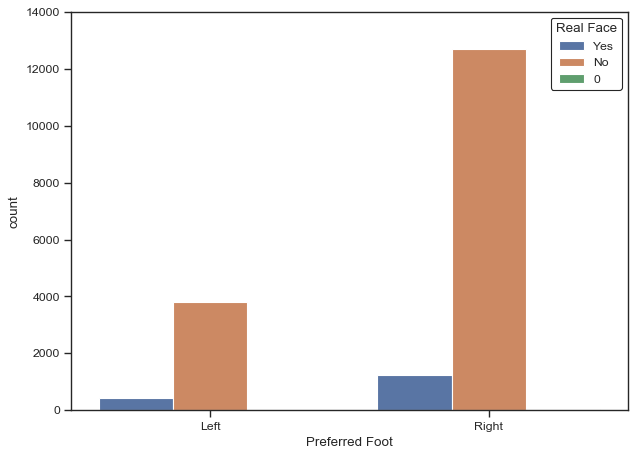

In [118]:
# Plot to show the preferred foot choice of different players
f, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x="Preferred Foot", hue="Real Face", data=fifa)
plt.show()

In [119]:
fifa.loc[fifa['Potential'].idxmax()][1] # Finding the player with the maximum potential

'K. Mbappé'

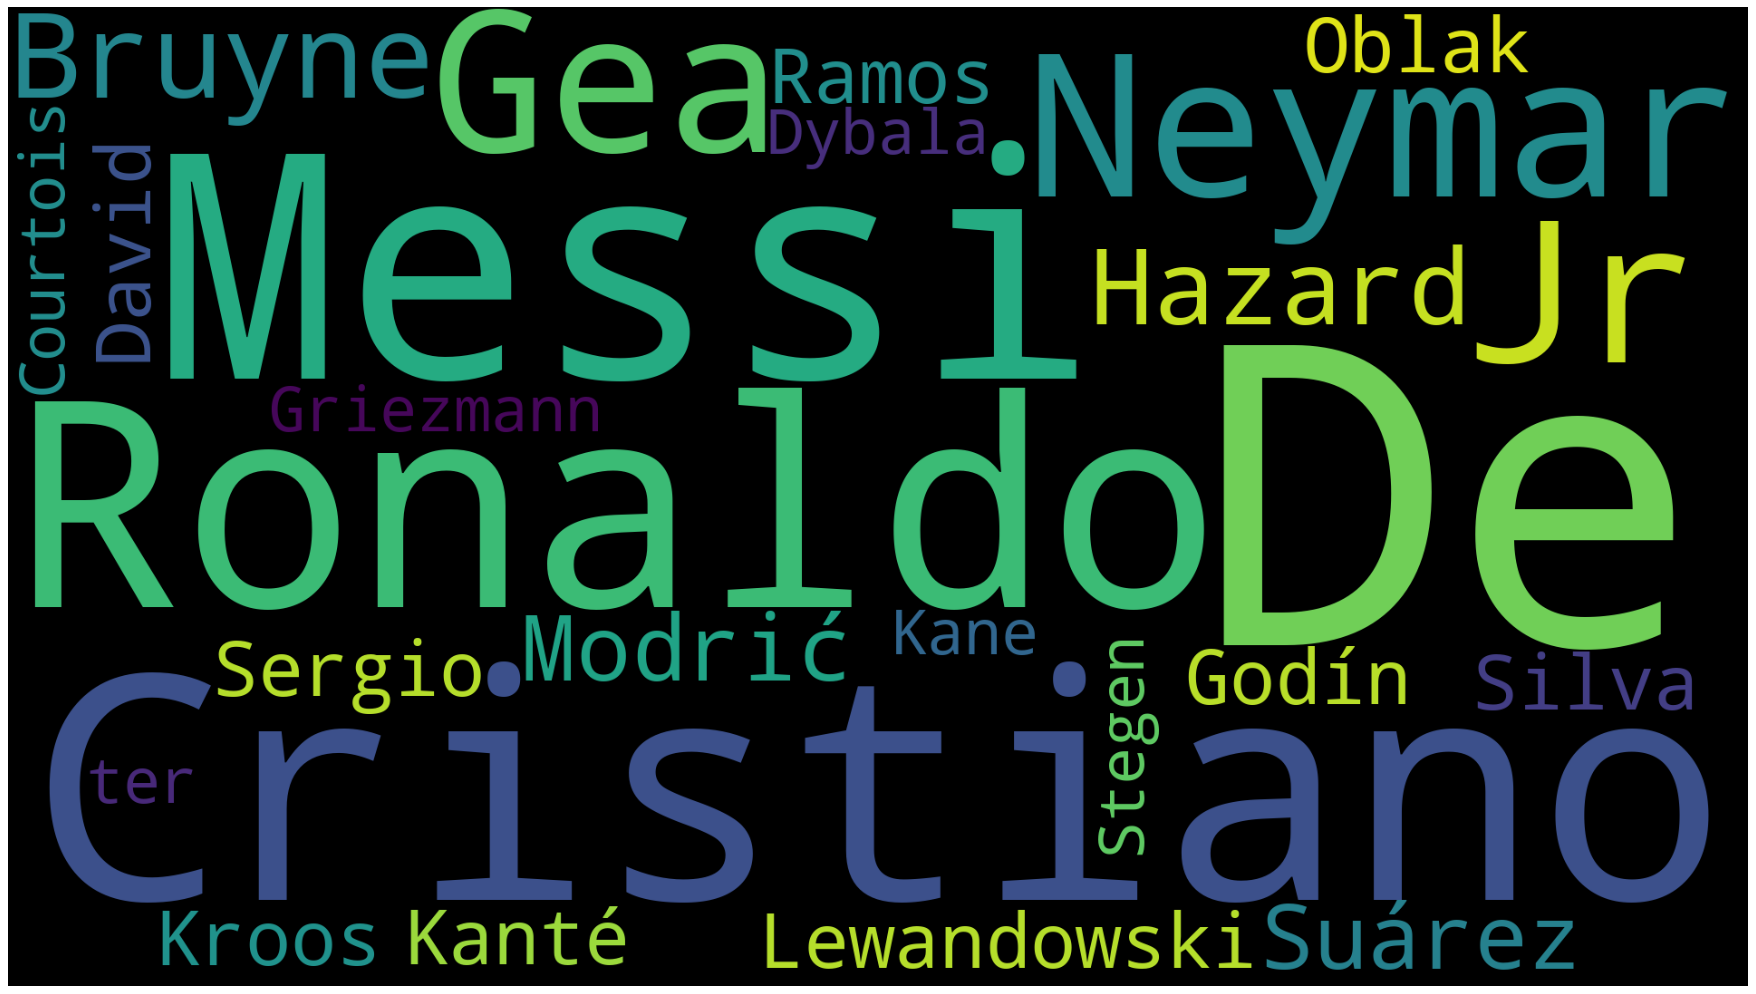

In [120]:
# showing the name of the players which occurs the most number of times from the first 20 names
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(fifa.Name[0:20]))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

In [122]:
fifa.columns # all the columns in the dataset

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club_Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiv

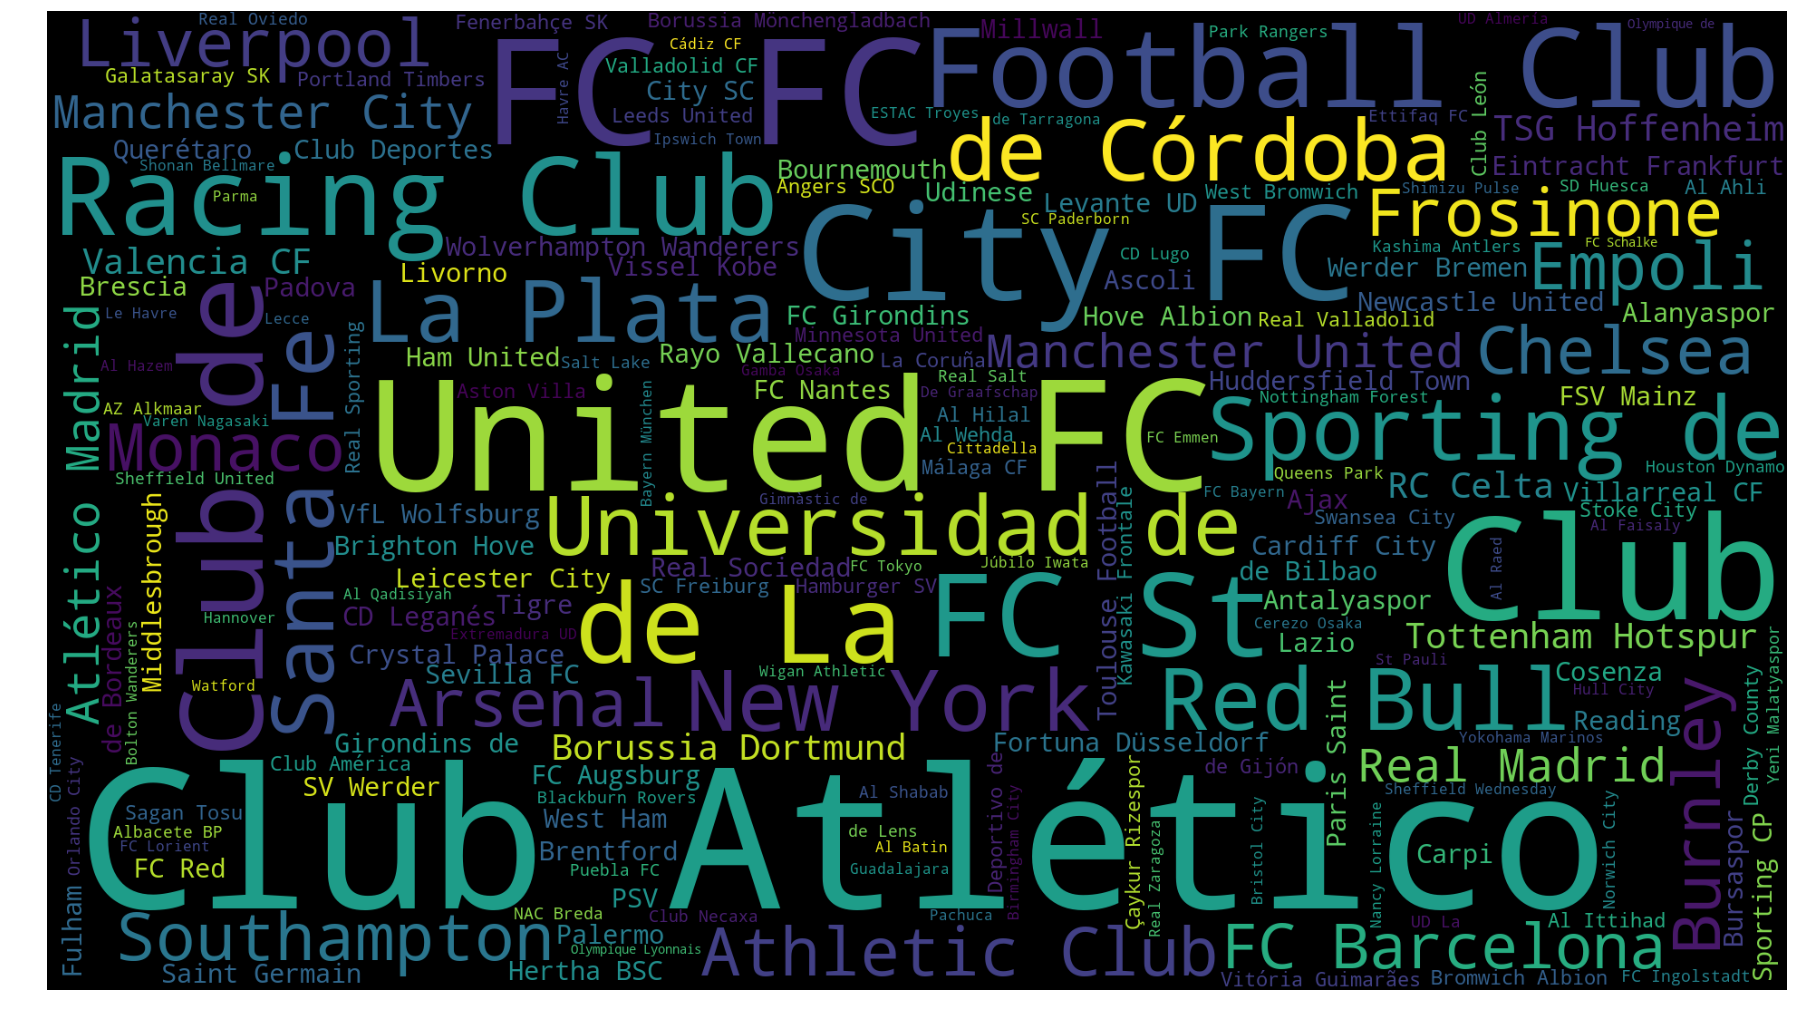

In [72]:
# checking which clubs have been mentioned the most
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(fifa.Club))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

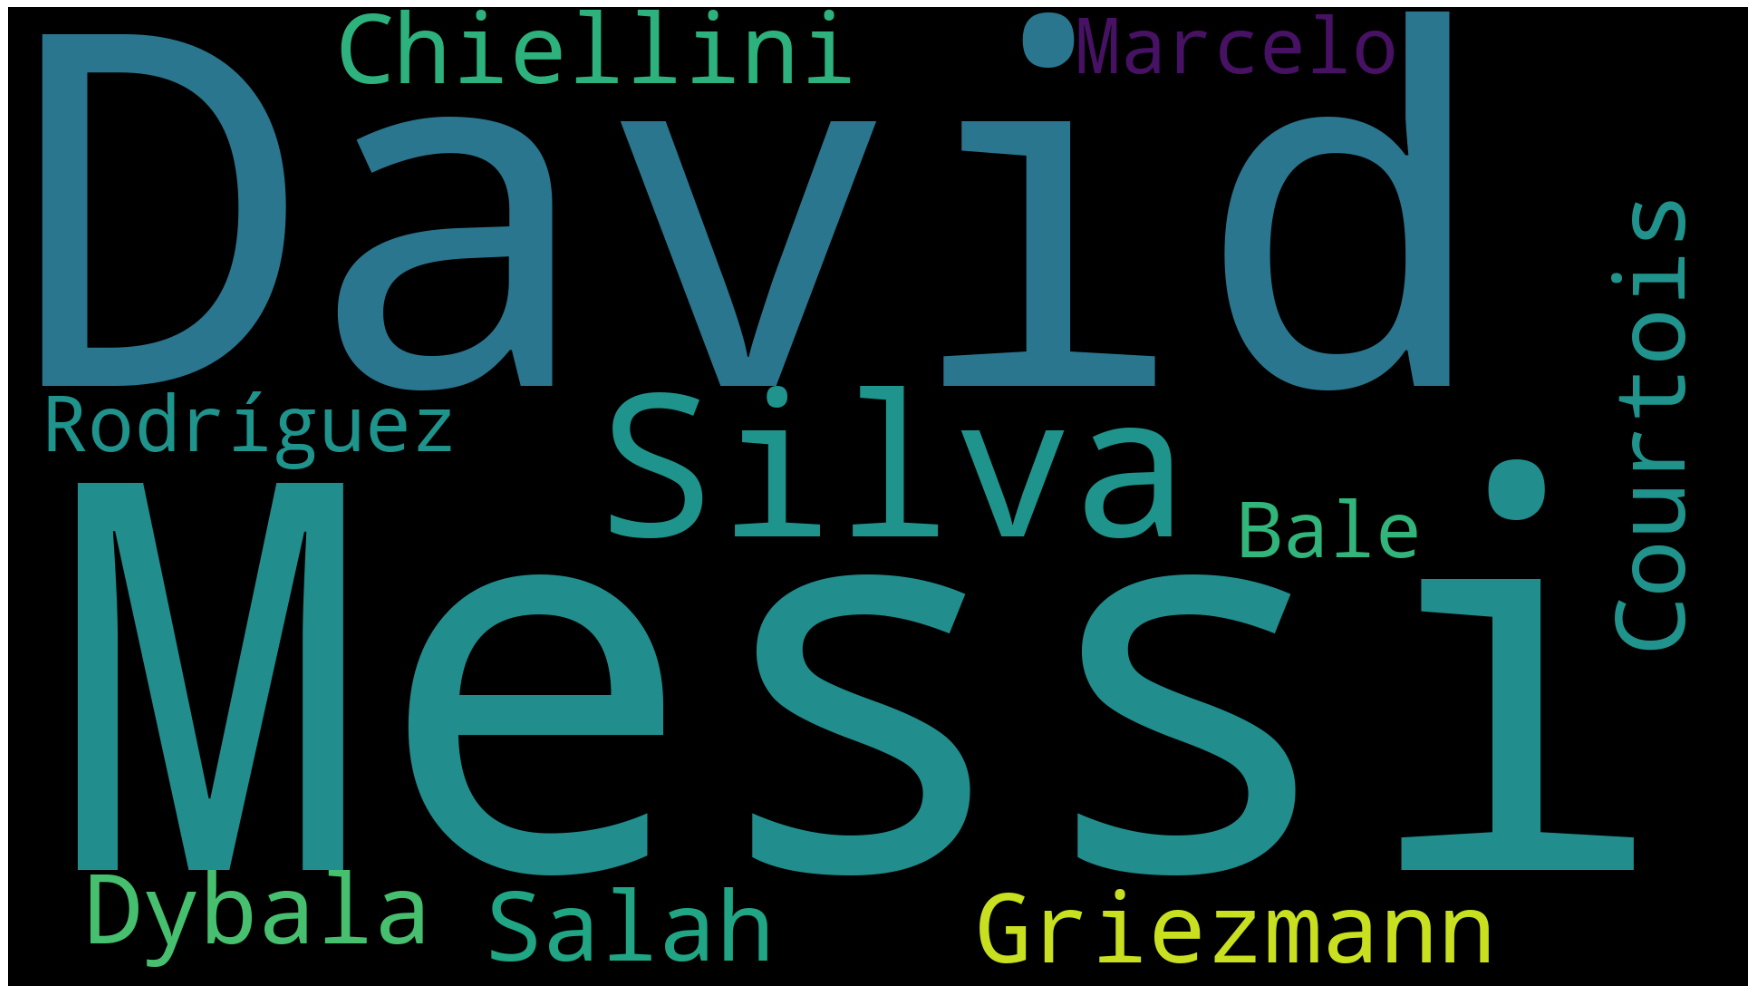

In [123]:
# showing the name of the players which occurs the most number of times(left join)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='black',
                          width=1920,
                          height=1080
                         ).generate(" ".join(left.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

In [9]:
#df.columns

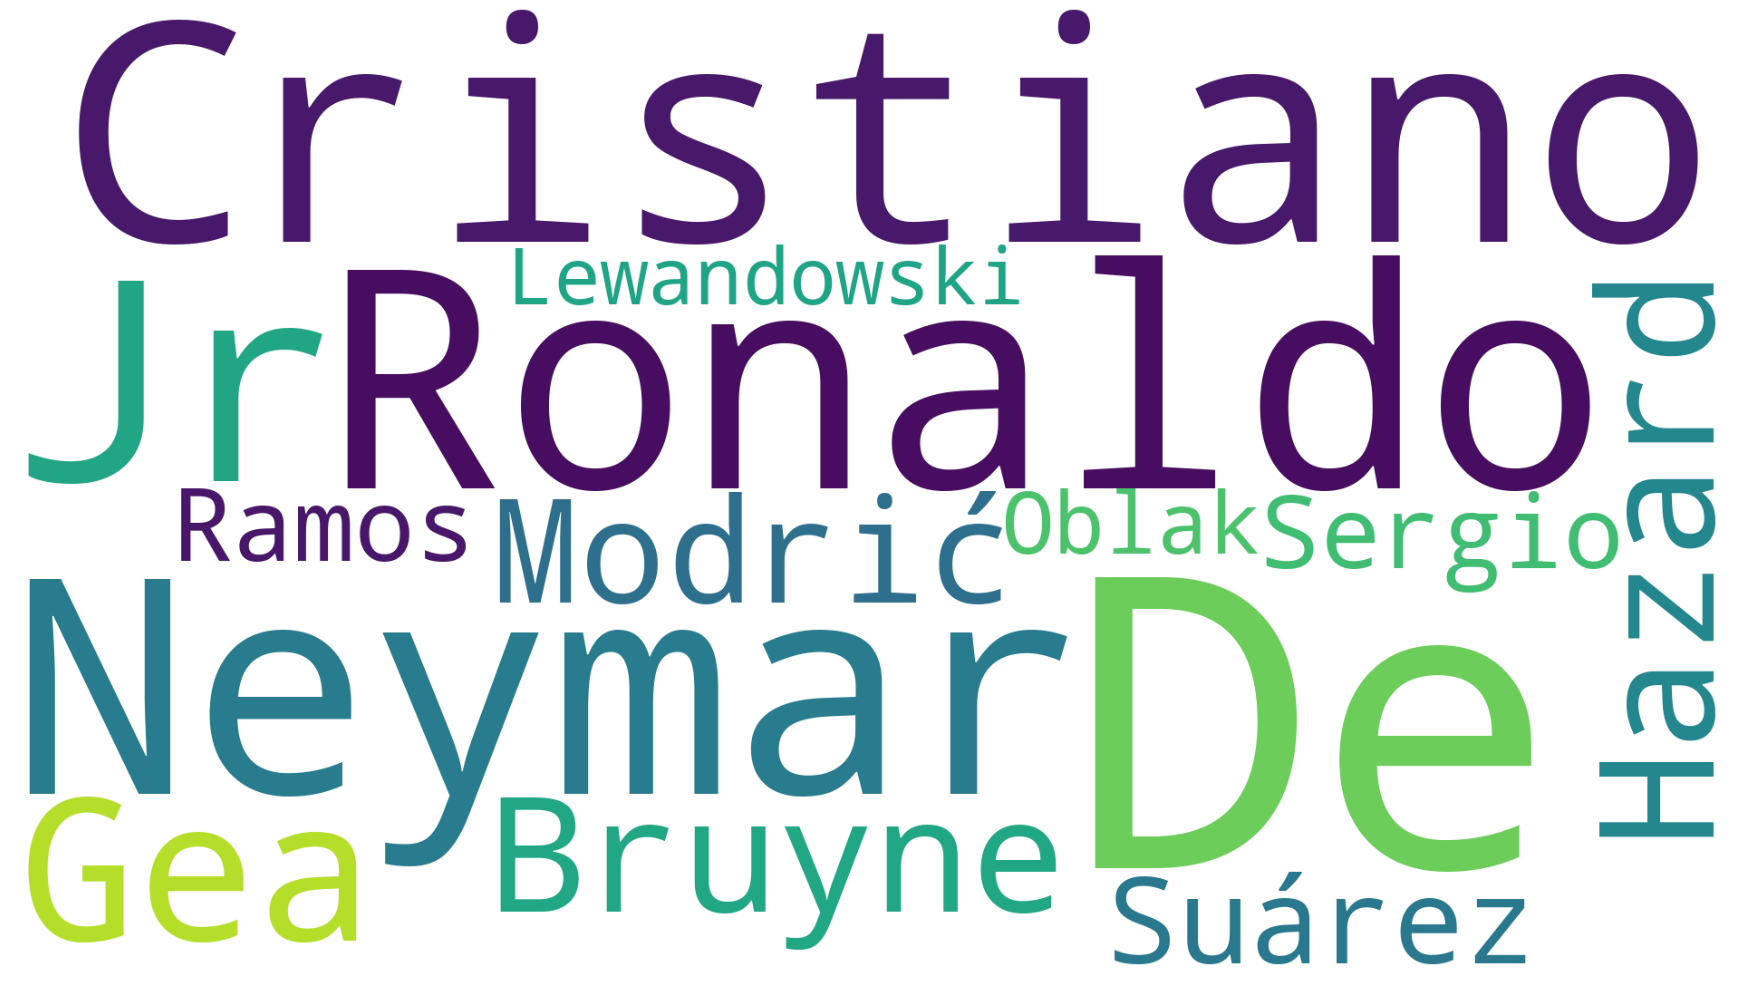

In [124]:
# showing the name of the players which occurs the most number of times(right join)
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(right.Name))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

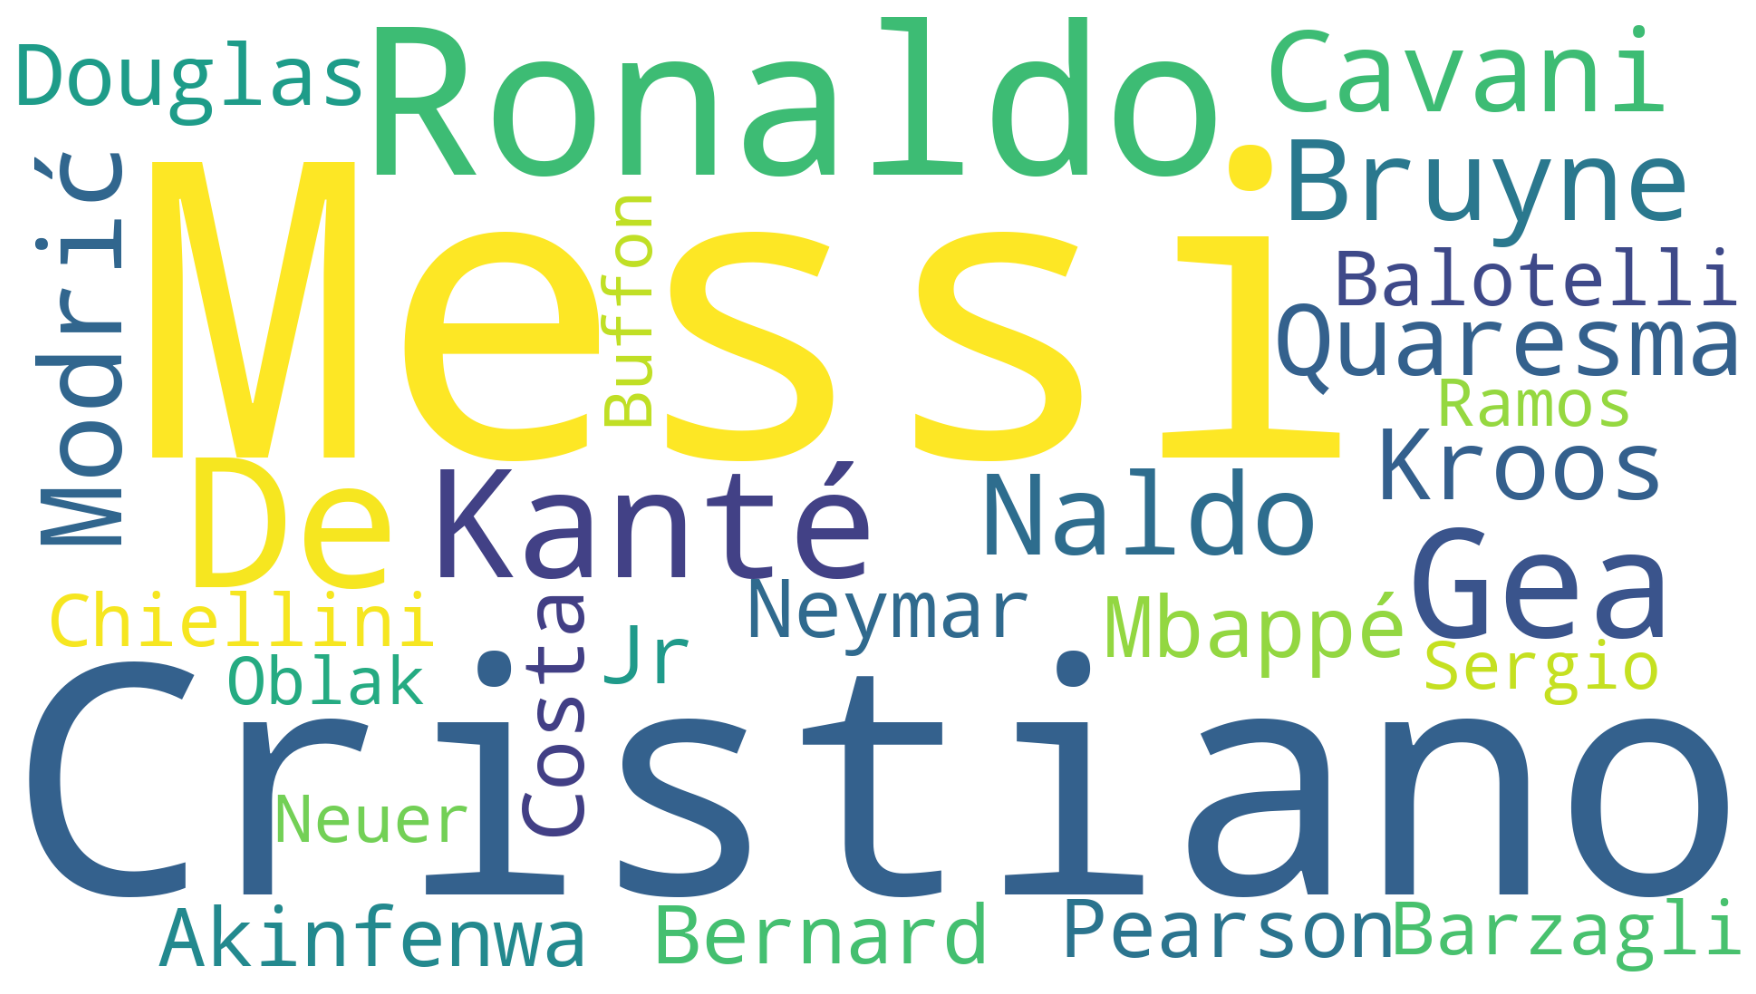

In [125]:
# Checking which player has been mentioned the most in the 'best' list that we have prepared
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(best))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('players.png')
plt.show()

In [74]:
import requests
import random
from math import pi

import matplotlib.image as mpimg
from matplotlib.offsetbox import (OffsetImage,AnnotationBbox)

# defining a method to show the details of a player
def details(row, title, image, age, nationality, photo, logo, club):
    
    flag_image = "img_flag.jpg"
    player_image = "img_player.jpg"
    logo_image = "img_club_logo.jpg"
     
    # obtaining the player image, flag image and logo image
    img_flag = requests.get(image).content
    with open(flag_image, 'wb') as handler:
        handler.write(img_flag)
    
    player_img = requests.get(photo).content
    with open(player_image, 'wb') as handler:
        handler.write(player_img)
     
    logo_img = requests.get(logo).content
    with open(logo_image, 'wb') as handler:
        handler.write(logo_img)
     
    # Defining the colour schemes
    r = lambda: random.randint(0,255)
    colorRandom = '#%02X%02X%02X' % (r(),r(),r())
    
    if colorRandom == '#ffffff':colorRandom = '#a5d6a7' # if random colour  is white, assign a different colour
    
    basic_color = '#37474f'
    color_annotate = '#01579b'
    
    img = mpimg.imread(flag_image)
    
    plt.figure(figsize=(15,8))
    categories=list(players)[1:]
    coulumnDontUseGraph = ['Flag', 'Age', 'Nationality', 'Photo', 'Logo', 'Club']
    N = len(categories) - len(coulumnDontUseGraph)
    
    # adjusting the angles to show different aspects in the graph
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
    
    ax = plt.subplot(111, projection='polar') # sepcifying a  polar graph type
    ax.set_theta_offset(pi / 2) # set the offset in radians
    ax.set_theta_direction(-1) #the angle increases in the clockwise direction
    plt.xticks(angles[:-1], categories, color= 'black', size=17)
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75,100], ["25","50","75","100"], color= basic_color, size= 10)
    plt.ylim(0,100)
    
    #creating the list of values which are not in (image, age, nationality, photo, logo, club) to show in the graph
    values = players.loc[row].drop('Name').values.flatten().tolist() 
    valuesDontUseGraph = [image, age, nationality, photo, logo, club]
    values = [e for e in values if e not in (valuesDontUseGraph)]
    values += values[:1]
    
    # customizing the graph attributes
    ax.plot(angles, values, color= basic_color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color= colorRandom, alpha=0.5)
    axes_coords = [0, 0, 1, 1]
    ax_image = plt.gcf().add_axes(axes_coords,zorder= -1)
    ax_image.imshow(img,alpha=0.5)
    ax_image.axis('off')
    
    # placeholders for showing nationality, age and team name
    ax.annotate('Nationality: ' + nationality.upper(), xy=(10,10), xytext=(103, 138),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
                      
    ax.annotate('Age: ' + str(age), xy=(10,10), xytext=(43, 180),
                fontsize= 15,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})
    
    ax.annotate('Team: ' + club.upper(), xy=(10,10), xytext=(92, 168),
                fontsize= 12,
                color = 'white',
                bbox={'facecolor': color_annotate, 'pad': 7})

    # specifying the location for showing the image of player
    arr_img_player = plt.imread(player_image, format='jpg')
    imagebox_player = OffsetImage(arr_img_player)
    imagebox_player.image.axes = ax
    abPlayer = AnnotationBbox(imagebox_player, (0.5, 0.7),
                        xybox=(313, 223),
                        xycoords='data',
                        boxcoords="offset points"
                        )
    # specifying the location for showing the logo
    arr_img_logo = plt.imread(logo_image, format='jpg')
    
    imagebox_logo = OffsetImage(arr_img_logo)
    imagebox_logo.image.axes = ax
    abLogo = AnnotationBbox(imagebox_logo, (0.5, 0.7),
                        xybox=(-350, -246),
                        xycoords='data',
                        boxcoords="offset points"
                        )

    ax.add_artist(abPlayer)
    ax.add_artist(abLogo)

    plt.title(title, size=50, color= basic_color)

In [75]:
# defining a method to show the leading performers
def graphPolar(id = 0):
    if 0 <= id < len(data.ID):
        details(row = players.index[id], 
                title = players['Name'][id], 
                age = players['Age'][id], 
                photo = players['Photo'][id],
                nationality = players['Nationality'][id],
                image = players['Flag'][id], 
                logo = players['Club_Logo'][id], 
                club = players['Club'][id])
    else:
        print('The base has 17917 players. You can put positive numbers from 0 to 17917')

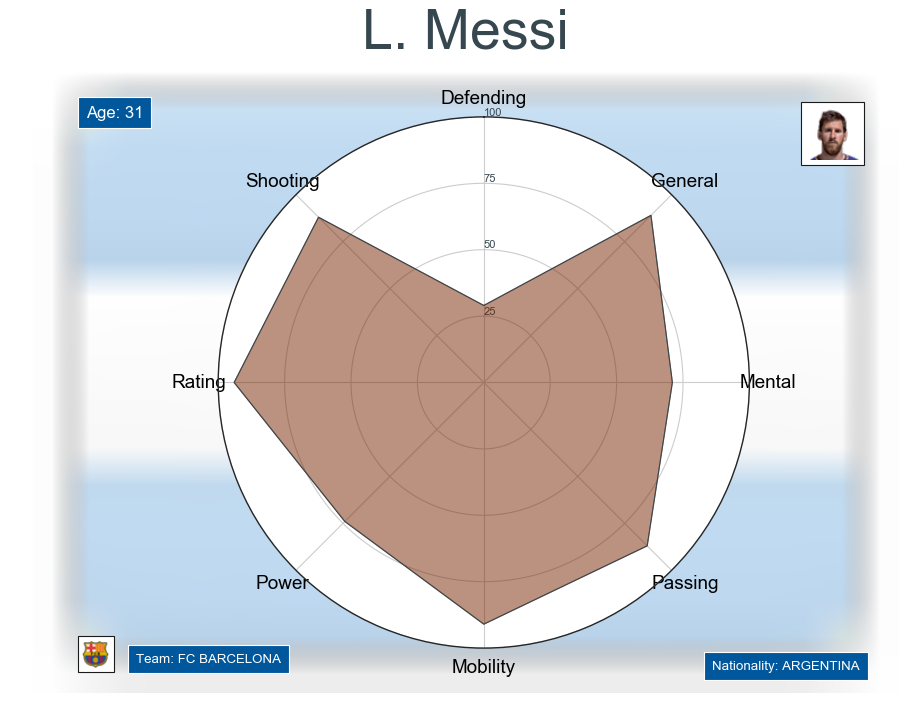

In [76]:
graphPolar(0)

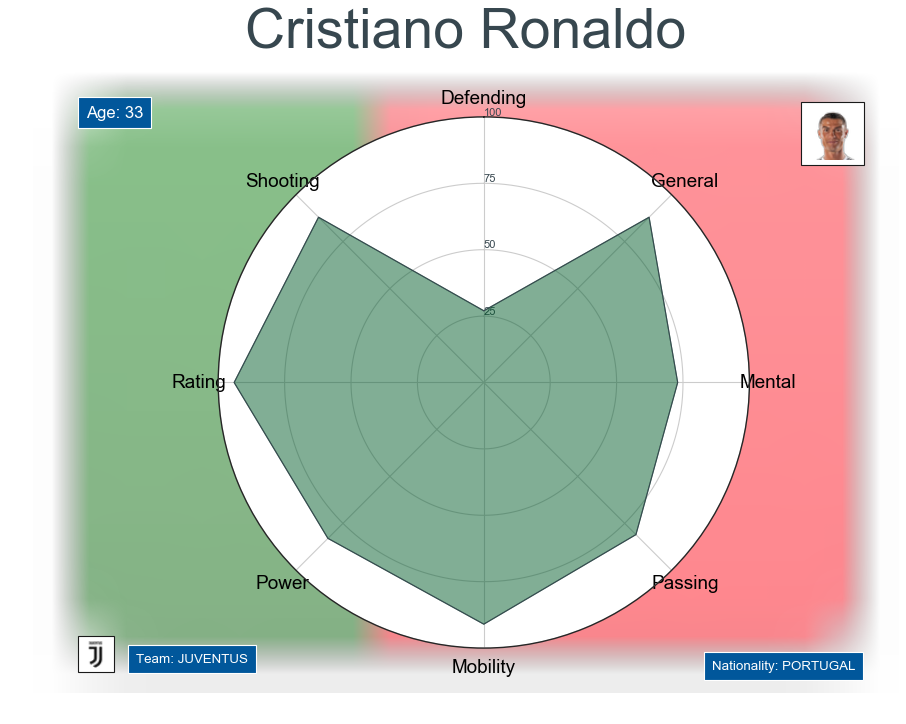

In [77]:
graphPolar(1)

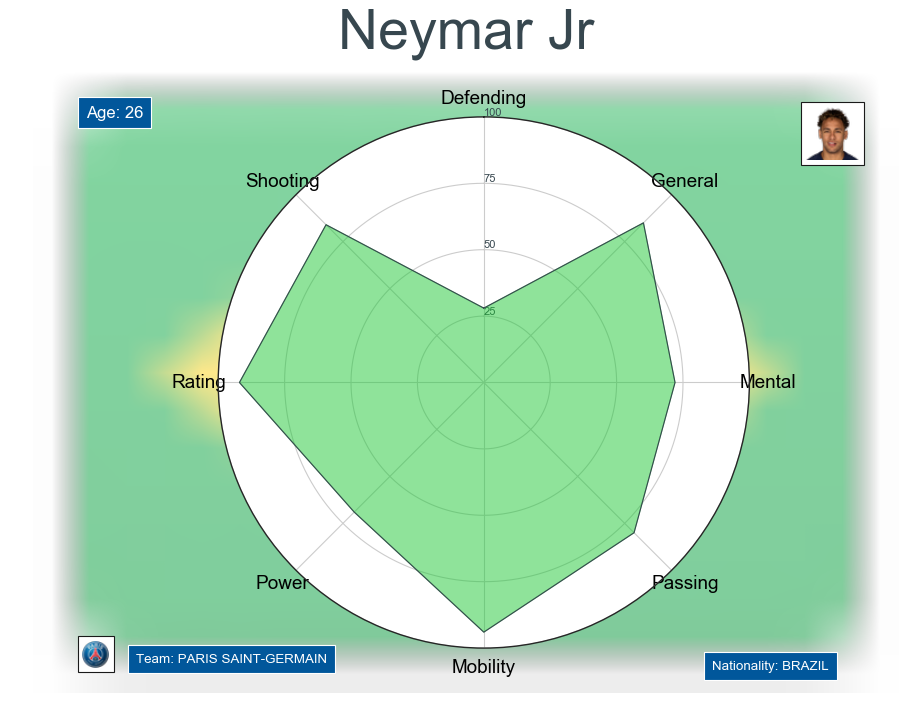

In [78]:
graphPolar(2)

# End of the Notebook